
# Studying The Relationship between Consumer and Government Spending and Presidential Approval Ratings

## Permissions
[X] YES - make available <br>
[ ] NO - keep private

## Overview
Our project aims to examine the relationship between consumer non-essential spending and government spending with perceived approval of the sitting president.

## Group Members
Martyna Marcinkowska, <br>
Alyssa Goebel, <br>
Sachiko Brown, <br>
Janhavi Chafekar, <br>
Haley Rezendes
## PIDs
A16140394, <br>
A13296387, <br>
A15631683, <br>
A15109120, <br>
A14597775

## Research Question

How does presidential approval rating correlate with consumer and government expenditure? Specifically, how does presidential approval rating correlate with sales of cars, sales of clothes, restaurant sales, and government social benefits to persons?

## Background & Prior Work ##

After revising our original idea, our team ultimately decided on a political/economic route for this project. We were interested to see whether there is a correlation between presidential approval ratings and consumer spending. <br> In general, presidential approval ratings can be affected by a variety of factors including current events, political orientation, and overall job performance. With this said, there seems to be a slight indication of decline in presidential approval ratings since 1990 (Gallup, 2019). Interestingly, the Economist reports that, in the past 12 years, consumer confidence has predicted presidential popularity, but that trend seems to be changing in the era of Trump. <br> Our team remotely collaborated to decide which categories of spending data would create a well-rounded picture of non-essential spending by consumers. We concluded that purchases of cars, clothing, and restaurant food/drinks would be most indiciative of the major trends in personal spending. In addition, we were inspired by current events in the time of COVID-19 to also include government social benefits to persons which includes items like stimulus checks and see whether those might be correlated with overall approval as well.


**References**

1. https://news.gallup.com/interactives/185273/presidential-job-approval-center.aspx

2. https://www.economist.com/united-states/2020/01/11/consumer-confidence-no-longer-translates-into-presidential-popularity

## Hypothesis ##

We hypothesize that more spending (or in particular, consumers having more money to spend and things to spend money on) would be correlated with higher perceived job approval of the president.<br> When people have money in their pocket to spend on non-essentials like going out, cars or clothing, it suggests they don't live paycheck-to-paycheck, worry about essentials, they feel less stressed, and happier overall. Thus, they feel like things are generally going well in their life, and their country. This could co-occur with them being more satisfied, or approving, of the country's leader: in the US case, the president. During time of crisis, it's also important to people whether they're receiving the help they need so the more social benefits that the government is handing out, the more people might feel like the crisis is handled well and will thus approve of the president. <br> If this hypothesis is true, with unemployment rising steadily because of the COVID-19 crisis, people have less money to spend on non-essentials so we can guess that President Trump's approval is falling. However, it might be that the fall has been mitigated due to the stimulus checks that have been distributed.

## Data ##

Our presidential approval data comes from the American Presidency Project from University of California Santa Barbara. This project is non-profit and non-partisan, so it is likely the most objective source we can find. Their website says that they consider themselves, "the source of presidential documents on the internet" and boasts over 130,000 documents. Our spending data originates with the Federal Reserve Bank of St. Louis which tracks tons of economical data for the United States including interest rates, unemployment, GDP and more. 

## Datasets

#### American Presidency Project - Approval Ratings

https://docs.google.com/spreadsheets/d/1iEl565M1mICTubTtoxXMdxzaHzAcPTnb3kpRndsrfyY/edit?usp=sharing

3,574 observations (for the 5 presidents we used)

The dataset we pulled lists survey results taken roughly biweekly for more recent presidents who we're investigating. We cleaned this data to compile and average ratings by month to standardize across the number of observations for each president we are examining. In out final dataset, we included Donald Trump, Barack Obama, George W. Bush, Bill Clinton, and George H.W. Bush, so our data set tracks monthly presidential approval data from April 2020 back to January 1989.


#### Retail Sales: Restaurants and Other Eating Places

https://fred.stlouisfed.org/series/MRTSSM7225USN

339 observations

Not seasonally-adjusted, monthly retail sales data of restaurants and other eating places in the US in millions of dollars since January 1992 till March 2020, collected by the United States Census Bureau.

#### Retail Sales: Clothing Stores

https://fred.stlouisfed.org/series/MRTSSM4481USS

339 observations

Seasonally-adjusted, monthly retail sales data of clothing stores in the US in millions of dollars since January 1992 till March 2020, collected by the United States Census Bureau.

#### Retail Sales: Auto and Other Motor Vehicles

https://fred.stlouisfed.org/series/MRTSSM441XUSS

339 observations 

Seasonally-adjusted, monthly retail sales data of autos and other motor vehicles in the US in millions of dollars since January 1992 till March 2020, collected by the United States Census Bureau.


#### Federal government current transfer payments: Government social benefits: to persons

https://fred.stlouisfed.org/series/B087RC1Q027SBEA

293 observations

[1-2 sentences describing each dataset.]


#### Monthly Inflation

https://inflationdata.com/Inflation/Inflation_Rate/Monthly_Inflation.aspx

340 observations (for the timespan we used)

Monthly US inflation rates (changes in prices since last month) since January 1992 to April 2020 based on the historical CPI-U data from the Bureau of Labor Statistics.

## Setup

In [2]:
from PIL import Image
#img = Image.open('Screen Shot 2020-05-28 at 1.38.09 PM.png')
#img

## Data Cleaning

The Presidential Approval data cleaning consisted of downloading each president's Google Sheet as a .CSV file, uploading to a Jupyter Notebook, converting dates to a date-time format, resampling observations into average monthly measures from the original ~2 week intervals, and labeling the entries with the name of the president being evaluated. This had to be reiterated for the past 5 presidents' sheets (Trump, Obama, W. Bush, Clinton, H.W. Bush), and then each president's dataframe was concatenated into a single dataframe via Pandas. The result is a tidy, rectangular dataframe that holds monthly approval ratings for the sitting president from April 2020 back to January 1989. We later adjusted to only go back to January 1992 to fit our spending datasets. <br>

Next, we scraped the inflation data from the inflationdata.com website which was initially in a table arranged by years as the rows and months as the columns. We converted it into a pandas dataframe with the date formatted to match the retail sales data (year-month-day) so we can easily merge both. It was also adjusted over time so we can relate a 1992 dollar to current dollar's value and so adjust the retail sales value by this percentage (e.g. 1 dollar in 1992 is equal to around 0.5 dollars in 2020) <br>

Next, we cleaned the three retail sales datasets. For this, we uploaded the corresponding .CSV  files to a Jupyter Notebook, renamed the columns, and used the monthly inflation dataset to manually adjust the values for inflation. <br>

Finally, we cleaned the Government Social Benefits to Persons data. 

# Data Analysis & Results

In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# import pandas and numpy
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#improve resolution
%config InlineBackend.figure_format ='retina'

# Statmodels & patsy
import patsy
import statsmodels.api as sm

from scipy.stats import skewtest 

## Approval Data

We're importing the cleaned approval dataframe and converting the date to only year-month format as the day is irrelevant (all observations are averages of many surveys that happened that month).

In [2]:
approval_df = pd.read_csv('ApprovalDataTo1989.csv')
approval_df['date_month_only'] = approval_df['End Date'].str[:7]
approval_df.head()

,End Date,Approving,Disapproving,Unsure/NoData,President,date_month_only
0,2020-04-30,46.0,50.5,5.5,Trump,2020-04
1,2020-03-31,46.5,48.5,5.0,Trump,2020-03
2,2020-02-29,48.0,49.5,2.5,Trump,2020-02
3,2020-01-31,46.5,51.5,2.0,Trump,2020-01
4,2019-12-31,45.0,51.0,4.0,Trump,2019-12


Firstly, we want to see the overall pattern in approval rating over time:

Text(0.5, 1.0, 'Approval of the presidents of the US (1989-2020)')

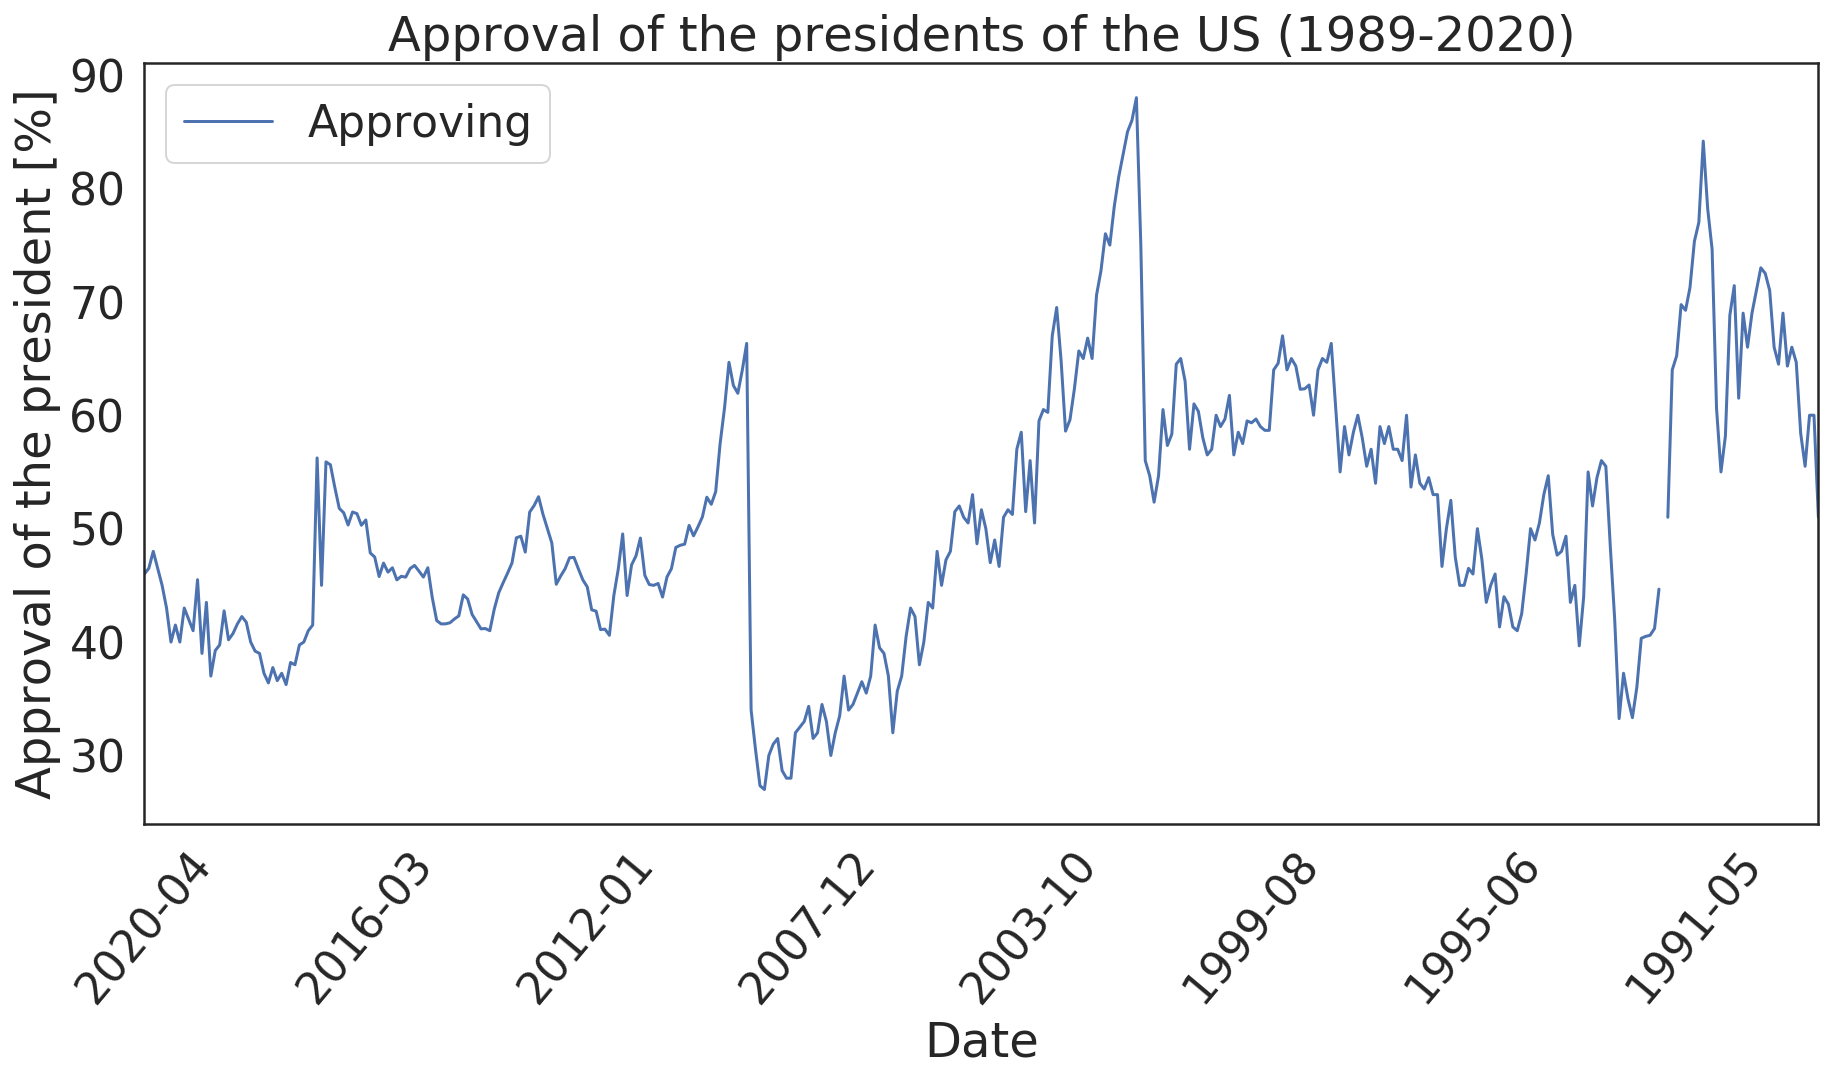

In [3]:
fig = approval_df.plot.line(x='date_month_only',y='Approving',rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Approval of the president [%]')
fig.set_title('Approval of the presidents of the US (1989-2020)')

## Part 1: Retail Sales: Autos and Other Motor Vehicles

We're importing the cleaned and adjusted for inflation vehicles sales dataframe.

In [4]:
vehicles_sales = pd.read_csv('vehicles_sales_clean.csv')
vehicles_sales.drop(columns='Unnamed: 0', inplace=True)
vehicles_sales.head()

FileNotFoundError: [Errno 2] File b'vehicles_sales_clean.csv' does not exist: b'vehicles_sales_clean.csv'

Firstly, we want to see the overall pattern in retail sales of autos over time:

In [ ]:
fig = vehicles_sales.plot.line(x='date',y='sales_adjusted',rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('Retail sales of autos and other motor vehicles (1992-2020)')

There seems to be an overall increase in approval till around 2008, then a huge decrease and a steady increase again till 2019 where we see another fall.

In [ ]:
vehicles_sales['date_month_only'] = vehicles_sales['date'].str[:7]
vehicles_approval_df = pd.merge(vehicles_sales, approval_df, how='outer')
vehicles_approval_df.dropna(inplace=True)
vehicles_approval_df.head()

Because of the variance each month between the unsure/no data category, we decided it'd be best if we took a percent of the total approving votes over the total of approving + disapproving votes. Similarly, to make comparisons between the ratings and the sales, we chose to look at sales this month over max total sales during that period.

In [ ]:
vehicles_approval_df['approval_to_disapproval'] = ((vehicles_approval_df['Approving'] / (vehicles_approval_df['Approving'] + vehicles_approval_df['Disapproving'])) * 100)
vehicles_approval_df['sales_percent_max'] = ((vehicles_approval_df['sales_adjusted'] / vehicles_approval_df['sales_adjusted'].max()) * 100)
vehicles_approval_df.head()

We wanted to see how is the data distributed:

In [ ]:
plt.figure(figsize=(30, 20))

plt.subplot(221)
sns.distplot(vehicles_approval_df['sales_percent_max'])
plt.xlabel('sales of motor vehicles [% of max, millions of 1992 dollars]')

plt.subplot(222)
sns.distplot(vehicles_approval_df['approval_to_disapproval'])
plt.xlabel('approval/disapproval of the president [%]');

In [ ]:
print( '\nSkewness test for sales data :\n', skewtest(vehicles_approval_df['sales_percent_max'])) 
print( '\nSkewness test for approval data :\n', skewtest(vehicles_approval_df['approval_to_disapproval']))

Since the data is skewed, we decided to take a natural log of the data which improves the skew of the approval significantly while not increasing the skew of sales as much and overall improves the models. 

In [ ]:
vehicles_approval_df['log_approval_to_disapproval'] = np.log(vehicles_approval_df['approval_to_disapproval'])
vehicles_approval_df['log_sales_percent_max'] = np.log(vehicles_approval_df['sales_percent_max'])
vehicles_approval_df.head()

In [ ]:
plt.figure(figsize=(30, 20))

plt.subplot(221)
sns.distplot(vehicles_approval_df['log_sales_percent_max'])
plt.xlabel('sales of motor vehicles [% of max, millions of 1992 dollars]')

plt.subplot(222)
sns.distplot(vehicles_approval_df['log_approval_to_disapproval'])
plt.xlabel('approval/disapproval of the president [%]');

In [ ]:
print( '\nSkewness test for sales data :\n', skewtest(vehicles_approval_df['log_sales_percent_max'])) 
print( '\nSkewness test for approval data :\n', skewtest(vehicles_approval_df['log_approval_to_disapproval']))

We want to see overall whether we can see a correlation between the two.

In [ ]:
fig = vehicles_approval_df.plot.line(x='date_month_only',y=['log_sales_percent_max', 'log_approval_to_disapproval'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Retail sales of autos and other motor vehicles (1992-2020)')

Looking at the graph we see a general increase in both sales of vehicles and approval will the year 2000. We then see a huge fall in approval and not such a dramatic fall in sales but nevetheless both are decreasing till 2008. Around 2008 the trend reverses and there seems to be an increase in sales but a decrease in approval. We also see many peaks which might be correlated with president changes and other events e.g. after the 2008 economic failure, we have a change of president (Bush to Obama) correlating with a huge peak. <br> Let's explore this further:

In [ ]:
outcome, predictors = patsy.dmatrices('log_approval_to_disapproval ~ log_sales_percent_max', vehicles_approval_df)
mod = sm.OLS(outcome, predictors)
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

We plot the created linear regression model but the line is nearly horizontal indicating that there is no correlation (coef around 0.1).

In [ ]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='log_sales_percent_max', y='log_approval_to_disapproval', alpha=0.3, data=vehicles_approval_df, s=100)

# Generate and plot the model fit line
xs = np.arange(vehicles_approval_df['log_sales_percent_max'].min(), vehicles_approval_df['log_sales_percent_max'].max()+0.5)
ys = 0.1198 * xs + 3.4234
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of motor vehicles [%]')
plt.ylabel('approval of the president [%]')
plt.legend();

However, as we saw before there was a change in pattern around 2008 so let's split the data and explore it separately.

In [ ]:
veh_app_df_2008 = vehicles_approval_df[:200]
veh_app_df_2020 = vehicles_approval_df[200:]

In [ ]:
outcome2, predictors2 = patsy.dmatrices('log_approval_to_disapproval ~ log_sales_percent_max', veh_app_df_2008)
mod2 = sm.OLS(outcome2, predictors2)
## fit the model
res2 = mod2.fit()

## look at the results
print(res2.summary())

We can know see a much stronger positive relationship between the two than before but it's still around 0.5 which is not a strong relationship overall.

In [ ]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='log_sales_percent_max', y='log_approval_to_disapproval', alpha=0.3, data=veh_app_df_2008, s=100)

# Generate and plot the model fit line
xs2 = np.arange(veh_app_df_2008['log_sales_percent_max'].min(), veh_app_df_2008['log_sales_percent_max'].max())
ys2 = 0.4836 * xs2 + 1.9058
plt.plot(xs2, ys2, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of motor vehicles [%]')
plt.ylabel('Approval of the president [%]')
plt.legend();

In [ ]:
outcome3, predictors3 = patsy.dmatrices('log_approval_to_disapproval ~ log_sales_percent_max', veh_app_df_2020)
mod3 = sm.OLS(outcome3, predictors3)
## fit the model
res3 = mod3.fit()

## look at the results
print(res3.summary())

And, surprisingly, contrary to our hypothesis, we see a negative correlation from 2008 onwards between the two but it's on the order of around -0.3 so quite weak.

In [ ]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='log_sales_percent_max', y='log_approval_to_disapproval', alpha=0.3, data=veh_app_df_2020, s=100)

# Generate and plot the model fit line
xs3 = np.arange(veh_app_df_2020['log_sales_percent_max'].min(), veh_app_df_2020['log_sales_percent_max'].max())
ys3 = -0.2713 * xs3 + 5.0316
plt.plot(xs3, ys3, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of motor vehicles [%]')
plt.ylabel('Approval of the president [%]')
plt.legend();

## Part 2: Retail Sales: Clothing stores

Importing in the cleaned clothing sales dataframe, adjusted for inflation:

In [5]:
clothing_sales = pd.read_csv('clothing_sales_eda.csv')
clothing_sales.drop(columns='Unnamed: 0', inplace=True)
clothing_sales.head()

FileNotFoundError: [Errno 2] File b'clothing_sales_eda.csv' does not exist: b'clothing_sales_eda.csv'

First, we want to look at the pattern in clothing retail sales over time (1992-2020).

In [ ]:
fig = clothing_sales.plot.line(x='date',y='sales_adjusted',rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('Retail sales of clothing (1992-2020)')

Overall, clothing sale seems to be pretty consistently increasing across time (even adjusted for inflation), with a couple major dips (one around 2008 and one recently in 2020).

We'll now merge the clothing sales dataframe with the presidential approval rating dataframe.

In [ ]:
clothing_sales = clothing_sales.assign(date_month_only = clothing_sales['date'].str[:7])
clothing_approval_df = pd.merge(clothing_sales, approval_df, how='outer')
clothing_approval_df.dropna(inplace=True)
clothing_approval_df.head()

Like the vehicle data, there is a lot of variance each month between the unsure/no data values. To account for this, we will take the percent of the total approving data over the total of approving + disapproving data. In addition, we will again transform sales each month over max total sales during that period (to get a percentage value) to compare with the ratings data.

In [ ]:
clothing_approval_df['approval_to_disapproval'] = ((clothing_approval_df['Approving'] / (clothing_approval_df['Approving'] + clothing_approval_df['Disapproving'])) * 100)
clothing_approval_df['sales_percent_max'] = ((clothing_approval_df['sales_adjusted'] / clothing_approval_df['sales_adjusted'].max()) * 100)
clothing_approval_df.head()

Now, we will look at the overall scatterplot relationship between clothing sales and approval ratings:

In [ ]:
fig = clothing_approval_df.plot.scatter(x= 'sales_adjusted', y='approval_to_disapproval', rot = 50, figsize = (15, 7))
fig.set_xlabel('Clothing sales adjusted for inflation')
fig.set_ylabel('Presidential Approval Ratings')
fig.set_title('Relationship between retail sales of clothing and approval of the president from 1992-2020')

There is a very significant outlier due to recent falls in sales due to COVID-19. Since we have enough data on presidential approval ratings/clothing sales from President Trump's term prior to COVID-19, we will drop that one value for March 2020. This is to limit confounding economic limitations from COVID-19 and keep focus on the relationship with presidential approval rating and clothing sales generally. 

In [ ]:
clothing_approval_df = clothing_approval_df.iloc[:341]

We will first run a basic corr function to see potential correlations:

In [ ]:
clothing_approval_df.corr()

By looking in the columns/rows corresponding with 'sales_adjusted' and 'approval_to_disapproval', it seems as though there will be a negative correlation (-0.442519).

We will now plot the lines for monthly clothing sales and approval ratings to view the correlation over time.

In [ ]:
fig = clothing_approval_df.plot.line(x='date_month_only',y=['sales_percent_max', 'approval_to_disapproval'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Retail sales of clothing (1992-2020)')

It's still somewhat difficult to make out any precise correlation based on this. There seems to be a positive correlation between the two from 1992 to around 2002 where both are increasing. After around 2003, there seems to be the opposite relationship where the lines diverge from each other, as ratings decrease while sales increase. There are a couple particularly large peaks in presidential approval, occuring in 2001 and 2008, which are possibly related to the current events at those times (9/11 and the 2008 economic crisis, respectively). Both of these approval increases seem to be accompanied by a slight decrease in clothing sales. 

We are going to run a regression analysis on this data:

In [ ]:
outcome, predictors = patsy.dmatrices('approval_to_disapproval ~ sales_percent_max', clothing_approval_df)
mod = sm.OLS(outcome, predictors)
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

In [ ]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='sales_percent_max', y='approval_to_disapproval', alpha=0.3, data=clothing_approval_df, s=100)

# Generate and plot the model fit line
xs = np.arange(clothing_approval_df['sales_percent_max'].min(), clothing_approval_df['sales_percent_max'].max()+0.5)
ys = -0.6286 * xs + 107.8014
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of clothing [%]')
plt.ylabel('approval of the president [%]')
plt.legend();

Interesting! Looks like there is an overall negative correlation. There seems to be a lot of variance from the line, though. The r-squared value is also pretty low (only 20% of approval explained by model).

To account for this, we will split the data between 1992-2003 and 2003-2020 and analyze correlations for each separately.

In [ ]:
df_92_to_03 = clothing_approval_df.iloc[:133]
df_03_to_20 = clothing_approval_df.iloc[133:]

In [ ]:
outcome, predictors = patsy.dmatrices('approval_to_disapproval ~ sales_percent_max', df_92_to_03)
mod = sm.OLS(outcome, predictors)
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

In [ ]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='sales_percent_max', y='approval_to_disapproval', alpha=0.3, data=df_92_to_03, s=100)

# Generate and plot the model fit line
xs = np.arange(df_92_to_03['sales_percent_max'].min(), df_92_to_03['sales_percent_max'].max()+0.5)
ys = 1.5048 * xs + -57.9426
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of clothing [%]')
plt.ylabel('approval of the president [%]')
plt.legend();

There looks like there's a positive correlation from 1992-2003! The r-squared value is a bit higher here (40%) also which could indicate a stronger relationship occuring during this period.

In [ ]:
outcome, predictors = patsy.dmatrices('approval_to_disapproval ~ sales_percent_max', df_03_to_20)
mod = sm.OLS(outcome, predictors)
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

In [ ]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='sales_percent_max', y='approval_to_disapproval', alpha=0.3, data=df_03_to_20, s=100)

# Generate and plot the model fit line
xs = np.arange(df_03_to_20['sales_percent_max'].min(), df_03_to_20['sales_percent_max'].max()+0.5)
ys = -1.0260 * xs + 143.4078
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Sales of clothing [%]')
plt.ylabel('approval of the president [%]')
plt.legend();

There looks like there's more of a negative correlation explaining data from 2003-2020. However, r-squared value is again pretty low (only at 17%).

Clothing Retail Sales Conclusion (I put this here for now but we can cut it out from here and use it in the conclusion section instead once we organize later!)

In conclusion, there seems to be a general negative correlation between clothing sales and presidential approval rating, where more sales are made the lower the rating. This contradicts our original hypothesis in that consumer spending would be higher in times of presidential approval. With this said, there seems to be a greater positive correlation from 1992-2003, while negative correlation is strongest from 2003-2020. Additionally, r-squared value was highest during the positive correlation period from 1992-2003, while it was relatively low from 2003-2020 and overall. Since it is unknown why specifically these two periods vary so drastically in their regressions, there seems to be suggestion of confounding variables. 

Throughout the period between 1992-2020, clothing sales seem to be pretty steadily increasing, while at a higher rate at some points than others. On the other hand, the approval data is more irregular, as it shifts between periods of growth and decline. It is possible that any of the correlations found are simply responsive to how the approval rating data is behaving. Especially since there is a positive correlation from 1992-2003 (when approval is also increasing), and a negative correlation from 2003-2020 (when approval is decreasing). 

It is also important to note, though, that during major peaks in approval rating, the clothing sales seem to inversely respond. For example, when approval peaks near 2001 and 2008, clothing sales also dip at the same time. It seems as though during major domestic crises (9/11 in 2001, 2008 economic crisis), clothing spending goes down while approval rating simultaneously goes up. It could be that presidential approval rating is generally higher during times of crisis, which also happens to be when clothing sales are falling. Furthermore, a possible confounding variable could be that sales are driven more by current events/crises of the time, rather than the presidential approval rating necessarily. Or, maybe, a combination of both.

## Part 3: Retail Sales: Restaurants and Other Eating Places

Imported restaurant sales data and inflation data to clean the restaurant sales data. Standardizes the amount of money for each year that may change due to inflation rates

In [6]:
df_dollars = pd.read_csv('Restaurant data.csv')
df_dollars['DATE'] = pd.to_datetime(df_dollars['DATE'])
df_dollars['DATE'] =df_dollars['DATE'].dt.strftime('%Y-%m-%d')
df_dollars.rename(columns={'MRTSSM7225USN': 'Millions_Dollars', 'DATE': 'Date'}, inplace = True)
df_dollars.head()

FileNotFoundError: [Errno 2] File b'Restaurant data.csv' does not exist: b'Restaurant data.csv'

In [ ]:
inflation = pd.read_csv('inflation_values.csv')

In [ ]:
inflation.rename(columns={'Unnamed: 0':'year'}, inplace=True)
inflation = inflation.fillna(0)
inflation = inflation.astype({'year':int})
inflation.set_index('year')

The cleaned and adjusted restaurant data

In [ ]:
restaurant_sales = df_dollars.assign(inflation = inflation['inflation rate in %']) 
restaurant_sales = df_dollars.assign(inflation_adjusted = inflation['adjusted inflation']) 
restaurant_sales.head()

In [ ]:
restaurant_inflated = []
for ind, row in restaurant_sales.iterrows():
    if (ind == 0):
        sales = restaurant_sales.loc[ind, 'Millions_Dollars'] 
        restaurant_inflated.append(sales)
    elif (ind == 339): 
        continue
    else:
        sales = restaurant_sales.loc[ind, 'Millions_Dollars']
        percent_inflation = (restaurant_sales.loc[ind-1, 'inflation_adjusted']) 
        adjusted = sales * percent_inflation
        restaurant_inflated.append(adjusted)
restaurant_sales = restaurant_sales.assign(restaurant_adjusted = restaurant_inflated)

Importing the cleaned approval data set of presidents from 1992-2020. We converted the data to only have the year and month. Below is the overall trend of the data plotted. We then merged the two dataframes so they can be analyzed together.

In [ ]:
restaurant_sales['date_month'] = restaurant_sales['Date'].str[:7]

url = 'https://raw.githubusercontent.com/agoebel8990/Group-54/master/ApprovalDataTo1989.csv'
approval_datadf = pd.read_csv(url, error_bad_lines = False)

approval_datadf['date_month'] = approval_datadf['End Date'].str[:7]
approval_datadf.head()
df_merge = pd.merge(restaurant_sales, approval_datadf, how = 'outer')
df_merge.dropna(inplace = True)
df_merge

### Scatterplot of Restaurant Sales vs Approval and Disapproval

In [ ]:
fig = df_merge.plot.scatter(x='restaurant_adjusted', y='Approving', figsize=(15,7))
fig.set_xlabel('Restaurant Sales [millions of 1992 dollars]')
fig.set_ylabel('Approval of the president [%]')
fig.set_title('The relationship between approval of the president and restaurant spending(1992-2020)')

In [ ]:
fig = df_merge.plot.scatter(x='restaurant_adjusted', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Restaurant Sales [millions of 1992 dollars]')
fig.set_ylabel('Disapproval of the president [%]')
fig.set_title('The relationship between disapproval of the president and restaurant spending(1992-2020)')

Density plots of restaurant sales, approval data, and disapproval data are below. It shows if our data is normal or not. All three of them are skewed and need to be converted to log based values to see if the distribution improves.

In [ ]:
plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df_merge['restaurant_adjusted'])
plt.xlabel('Restaurant Sales [millions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df_merge['Approving'])
plt.xlabel('Approval of the president [%]');

plt.subplot(233)
sns.distplot(df_merge['Disapproving'])
plt.xlabel('Disapproval of the president [%]');

Coverting the data to account for variance and running a skew test, the z-vales show that the data is skewed. Taking the natural log of this may improve the models to look for correlations.

In [ ]:
df_merge['max_percent_sales'] = ((df_merge['restaurant_adjusted'] / df_merge['restaurant_adjusted'].max()) * 100)
df_merge['approval_to_disapproval'] = ((df_merge['Approving'] / (df_merge['Approving'] + df_merge['Disapproving'])) * 100)
print( '\nSkewness test for Restaurant Data :\n', skewtest(df_merge['max_percent_sales'])) 
print( '\nSkewness test for approval data :\n', skewtest(df_merge['approval_to_disapproval']))

In [ ]:
df_merge['log_approval_to_disapproval'] = np.log(df_merge['approval_to_disapproval'])
df_merge['log_max_percent_sales'] = np.log(df_merge['max_percent_sales'])
df_merge

In [ ]:
plt.figure(figsize=(30, 20))

plt.subplot(221)
sns.distplot(df_merge['log_max_percent_sales'])
plt.xlabel('Restaurant Sales[% of max, millions of 1992 dollars]')

plt.subplot(222)
sns.distplot(df_merge['log_approval_to_disapproval'])
plt.xlabel('approval/disapproval of the president [%]');

The z-value has decreased down to 1.43 for Restaurant sales and has decreased to -0.946 for Approval data. COnverting to natural log has decreased the skew values of the data, but it is still highly skewed.

In [ ]:
print( '\nSkewness test for sales data :\n', skewtest(df_merge['log_max_percent_sales'])) 
print( '\nSkewness test for approval data :\n', skewtest(df_merge['log_approval_to_disapproval']))

### Data 1992-2020 

In [ ]:
fig = df_merge.plot.line(x='date_month',y=['log_max_percent_sales', 'log_approval_to_disapproval'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Restaurant Sales (1992-2020)')

There is a very low peak in 2008 followed by a very high peak. During this time, there was a change in presidents from Bush to Obama and a recession. There wasn't much change in consumer spending on restaurants during this time. There is also a high peak in approval rating around the last part of 2004/early 2005. 2004 was an election year where Bush was reelected meaning he may have had high approval ratings.

In [ ]:
outcome, predictors = patsy.dmatrices('log_approval_to_disapproval ~ log_max_percent_sales', df_merge)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())

A correlation coeffient of -0.4140 is not significant. This shows there isn't much of a relationship being analyzed. 

### Negative Correlation 1992-2020

In [ ]:
plt.figure(figsize=(15, 7))

sns.scatterplot(x='log_max_percent_sales', y='log_approval_to_disapproval', alpha=0.3, data=df_merge, s=100)
xs = np.arange(df_merge['log_max_percent_sales'].min(), df_merge['log_max_percent_sales'].max()+0.5)
ys = -0.4140 * xs + 5.6557
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Restaurant Sales [%]')
plt.ylabel('Approval of the president [%]')
plt.legend();


There is a negative correlation shown from the graph. The trends for restaurant sales and approval ratings diverge from each other right after the large peak of 2008. Approval ratings start decreasing while restaurant sales gradually increase. We will split up the data and look at the years 1992-2007 and then 2008-2020 to compare the differences.

### Data 1992-2007

In [ ]:
df_92_to_07 = df_merge.iloc[:192]
df_92_to_07
fig = df_92_to_07.plot.line(x='date_month',y=['log_max_percent_sales', 'log_approval_to_disapproval'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Restaurant Sales and Approval (1992-2007)')

In [ ]:
outcome, predictors = patsy.dmatrices('log_approval_to_disapproval ~ log_max_percent_sales', df_92_to_07)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())

There is still a correlation coeffient of -0.4262 for 1992-2007. Not much has changed in this data. There will still show a negative correlation that is only slightly larger than the one for all the years 1992-2020. Looking at R-squared, it is very low. This is a very weak relationship.

### Negative Correlation 1992-2007

In [ ]:
plt.figure(figsize=(15, 7))

sns.scatterplot(x='log_max_percent_sales', y='log_approval_to_disapproval', alpha=0.3, data=df_92_to_07, s =100)
xs = np.arange(df_92_to_07['log_max_percent_sales'].min(), df_92_to_07['log_max_percent_sales'].max()+0.5)
ys = -0.4262 * xs + 5.7156
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Restaurant Sales [%]')
plt.ylabel('Approval of the president [%]')
plt.legend();

We have a more negative correlation from 1992-2007! However, low correlation coefficent and r-squared prove not much of a correlation exits between the two data sets from 1992-2007. They are both lower values than the ones recieved from 1992-2020.

### Data 2008-2020

In [ ]:
df_08_to_20 = df_merge.iloc[193:]
df_08_to_20
fig = df_08_to_20.plot.line(x='date_month',y=['log_max_percent_sales', 'log_approval_to_disapproval'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Restaurant Sales and Approval (2008-2020)')

In [ ]:
outcome, predictors = patsy.dmatrices('log_approval_to_disapproval ~ log_max_percent_sales', df_08_to_20)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())

In the graph, we see the two lines diverging from each other. We get a correlation coeffient of -0.1566 and an R-squared value of 0.015. These are very low and show no significant relationship between the 2 datasets.

### No Correlation 2008-2020

In [ ]:
plt.figure(figsize=(15, 7))

sns.scatterplot(x='log_max_percent_sales', y='log_approval_to_disapproval', alpha=0.3, data=df_08_to_20, s=100)
xs = np.arange(df_08_to_20['log_max_percent_sales'].min(), df_08_to_20['log_max_percent_sales'].max()+0.5)
ys = -0.1566 * xs + 4.5259
plt.plot(xs,ys,'--k', linewidth=4, label='Model')

plt.xlabel('Restaurant Sales [%]')
plt.ylabel('Approval of the president [%]')
plt.legend();

There is a very low regression and correlation that it does not plot the regression line. There is no correlation between the amount of money consumers spent on restaurants from 2008-2020 to the approval of the president from those same years.

## Government Social Benefits: Public Transfers

In [11]:
public_spending = 'public_spending.csv'
inflation = 'https://raw.githubusercontent.com/hrezende/Group-54/master/inflation_monthly.csv'
approval = 'https://raw.githubusercontent.com/agoebel8990/Group-54/master/ApprovalDataTo1989.csv'

In [12]:
df_PS = pd.read_csv(public_spending)
df_PS.rename(columns={'B087RC1Q027SBEA': 'Billions_Dollars', 'DATE': 'Date'}, inplace = True)

FileNotFoundError: [Errno 2] File b'public_spending.csv' does not exist: b'public_spending.csv'

In [7]:
df_I = pd.read_csv(inflation)
df_I.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df_I = df_I.fillna(0)
df_I = df_I.astype({'Date':int})
df_I['Jan'] = df_I['Jan'].str[:-1].astype(float)
df_I['Apr'] = df_I['Apr'].str[:-1].astype(float)
df_I['Jul'] = df_I['Jul'].str[:-1].astype(float)
df_I['Oct'] = df_I['Oct'].str[:-1].astype(float)
df_I = df_I.dropna()

In [8]:
df_A = pd.read_csv(approval)

In [9]:
dictionary_dates = {}
for i, row in df_I.iterrows():
    i_rate = df_I.loc[i, 'Jan']
    dates = {(str(df_I.loc[i, 'Date']) + '-01-01'):i_rate}
    dictionary_dates.update(dates)
for i, row in df_I.iterrows():
    i_rate = df_I.loc[i, 'Apr']
    dates = {(str(df_I.loc[i, 'Date']) + '-04-01'):i_rate}
    dictionary_dates.update(dates)
for i, row in df_I.iterrows():
    i_rate = df_I.loc[i, 'Jul']
    dates = {(str(df_I.loc[i, 'Date']) + '-07-01'):i_rate}
    dictionary_dates.update(dates)
for i, row in df_I.iterrows():
    i_rate = df_I.loc[i, 'Oct']
    dates = {(str(df_I.loc[i, 'Date']) + '-10-01'):i_rate}
    dictionary_dates.update(dates)

In [10]:
inflation_rates = []
for i, row in df_PS.iterrows():

    dates = df_PS.loc[i, 'Date']
    inflation_rates.append(dictionary_dates[dates])

df_PS['Inflation_Rate'] = inflation_rates

In [11]:
inflation_adjusted = []

for i, row in df_PS.iterrows(): 
    if (i == 0):
        percent = 1-((df_PS.loc[i, 'Inflation_Rate'])/100)
        inflation_adjusted.append(percent)
    else:
        percent = 1-((df_PS.loc[i, 'Inflation_Rate'])/100)
        adjusted = percent * inflation_adjusted[i-1]
        inflation_adjusted.append(adjusted)
    
df_PS['Inflation_Adjusted'] = inflation_adjusted

In [12]:
adjusted_sales = []

for i, row in df_PS.iterrows(): 
    if (i == 0):
        sales = df_PS.loc[i, 'Billions_Dollars']
        adjusted_sales.append(sales)
    elif (i == 339):
        continue
    else:
        sales = df_PS.loc[i, 'Billions_Dollars']
        percent = (df_PS.loc[i-1, 'Inflation_Adjusted'])
        adjusted = sales * percent
        adjusted_sales.append(adjusted)

df_PS['Adjusted_Sales'] = adjusted_sales

In [13]:
df_A['Month_Only'] = df_A['End Date'].str[:7]
df_PS['Month_Only'] = df_PS['Date'].str[:7]
df = df_PS.join(df_A.set_index('Month_Only'), on='Month_Only')

In [14]:
df['log_approval'] = np.log(df['Approving'])
df['log_disapproval'] = np.log(df['Disapproving'])
df['log_adjusted_sales'] = np.log(df['Adjusted_Sales'])

Text(0.5, 1.0, 'Presidential Approval and Disapproval (1992-2020)')

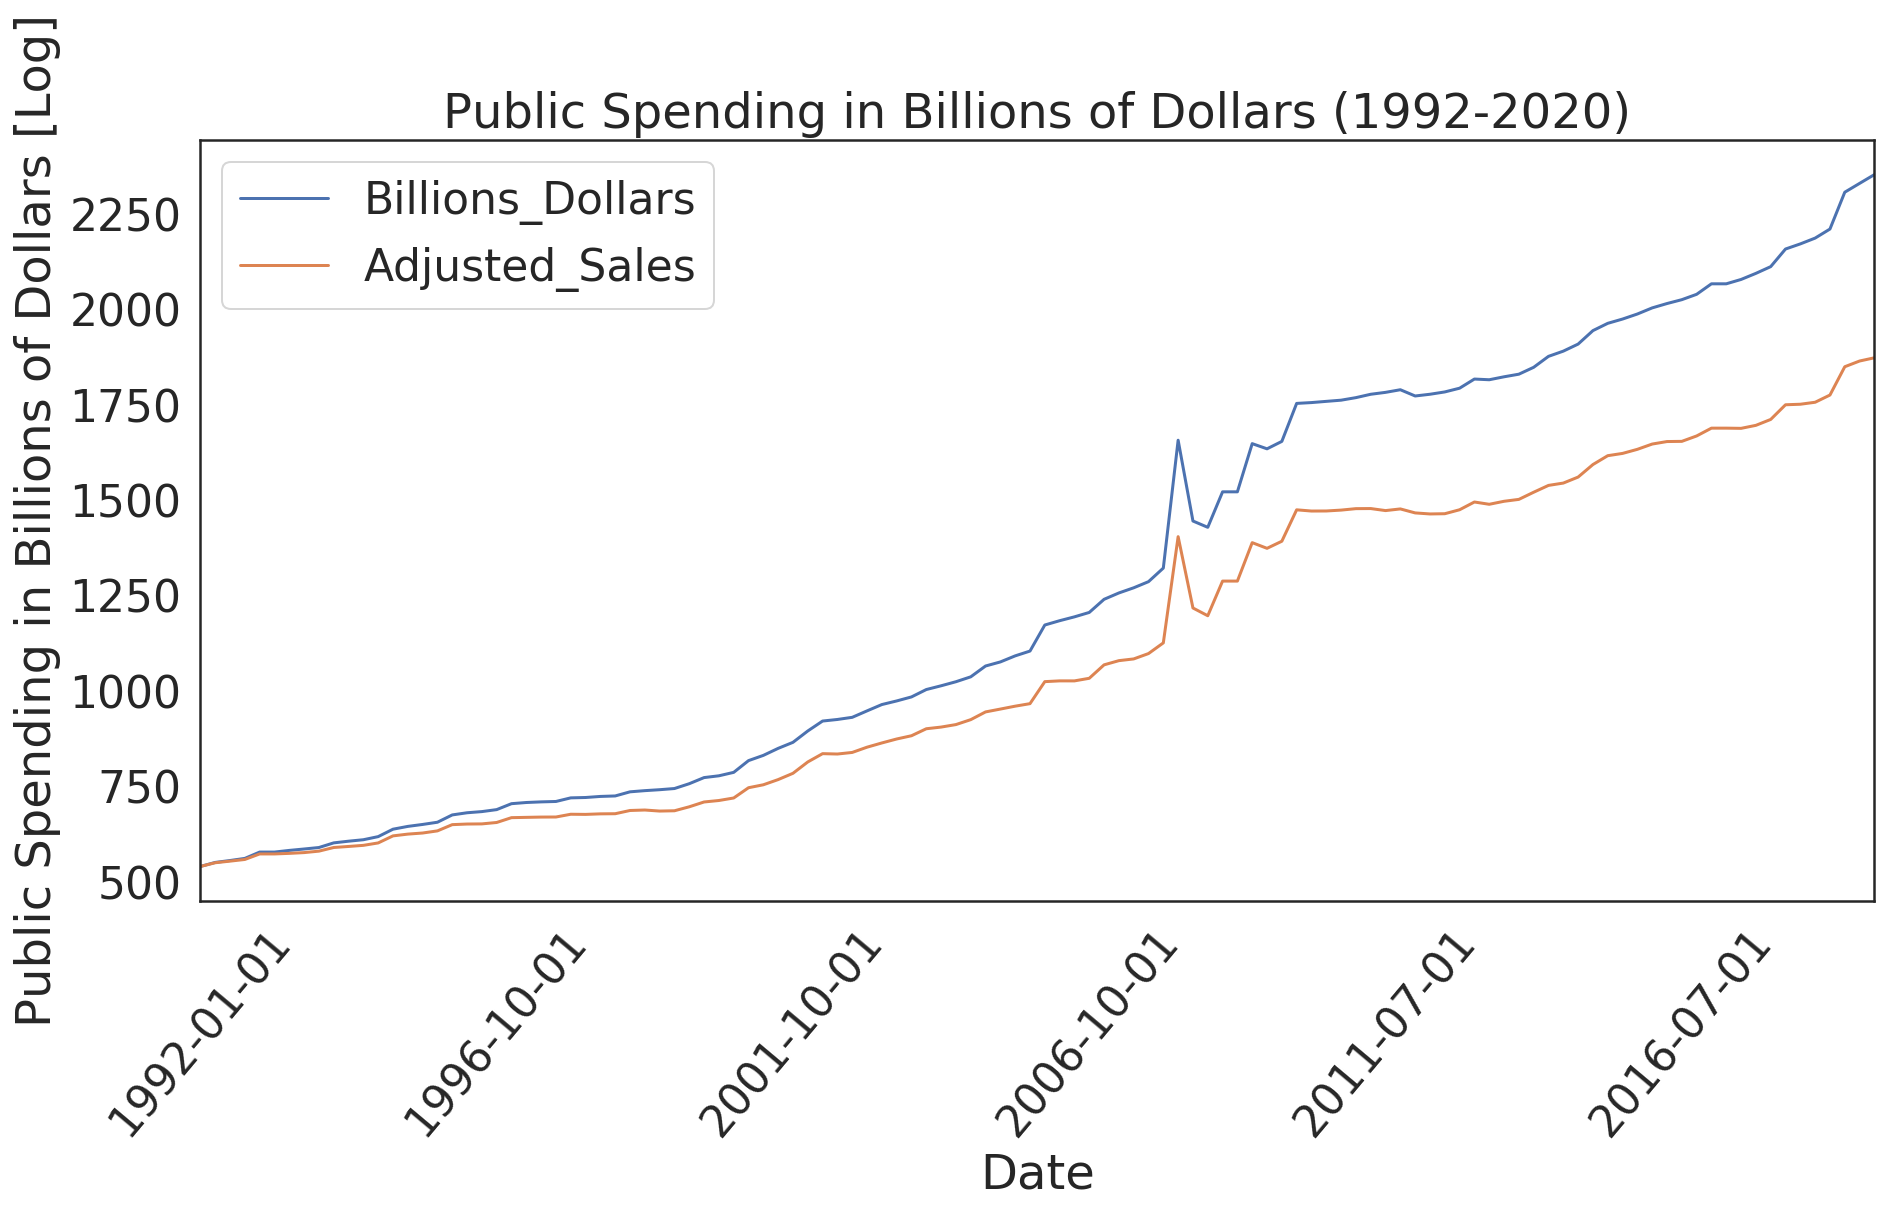

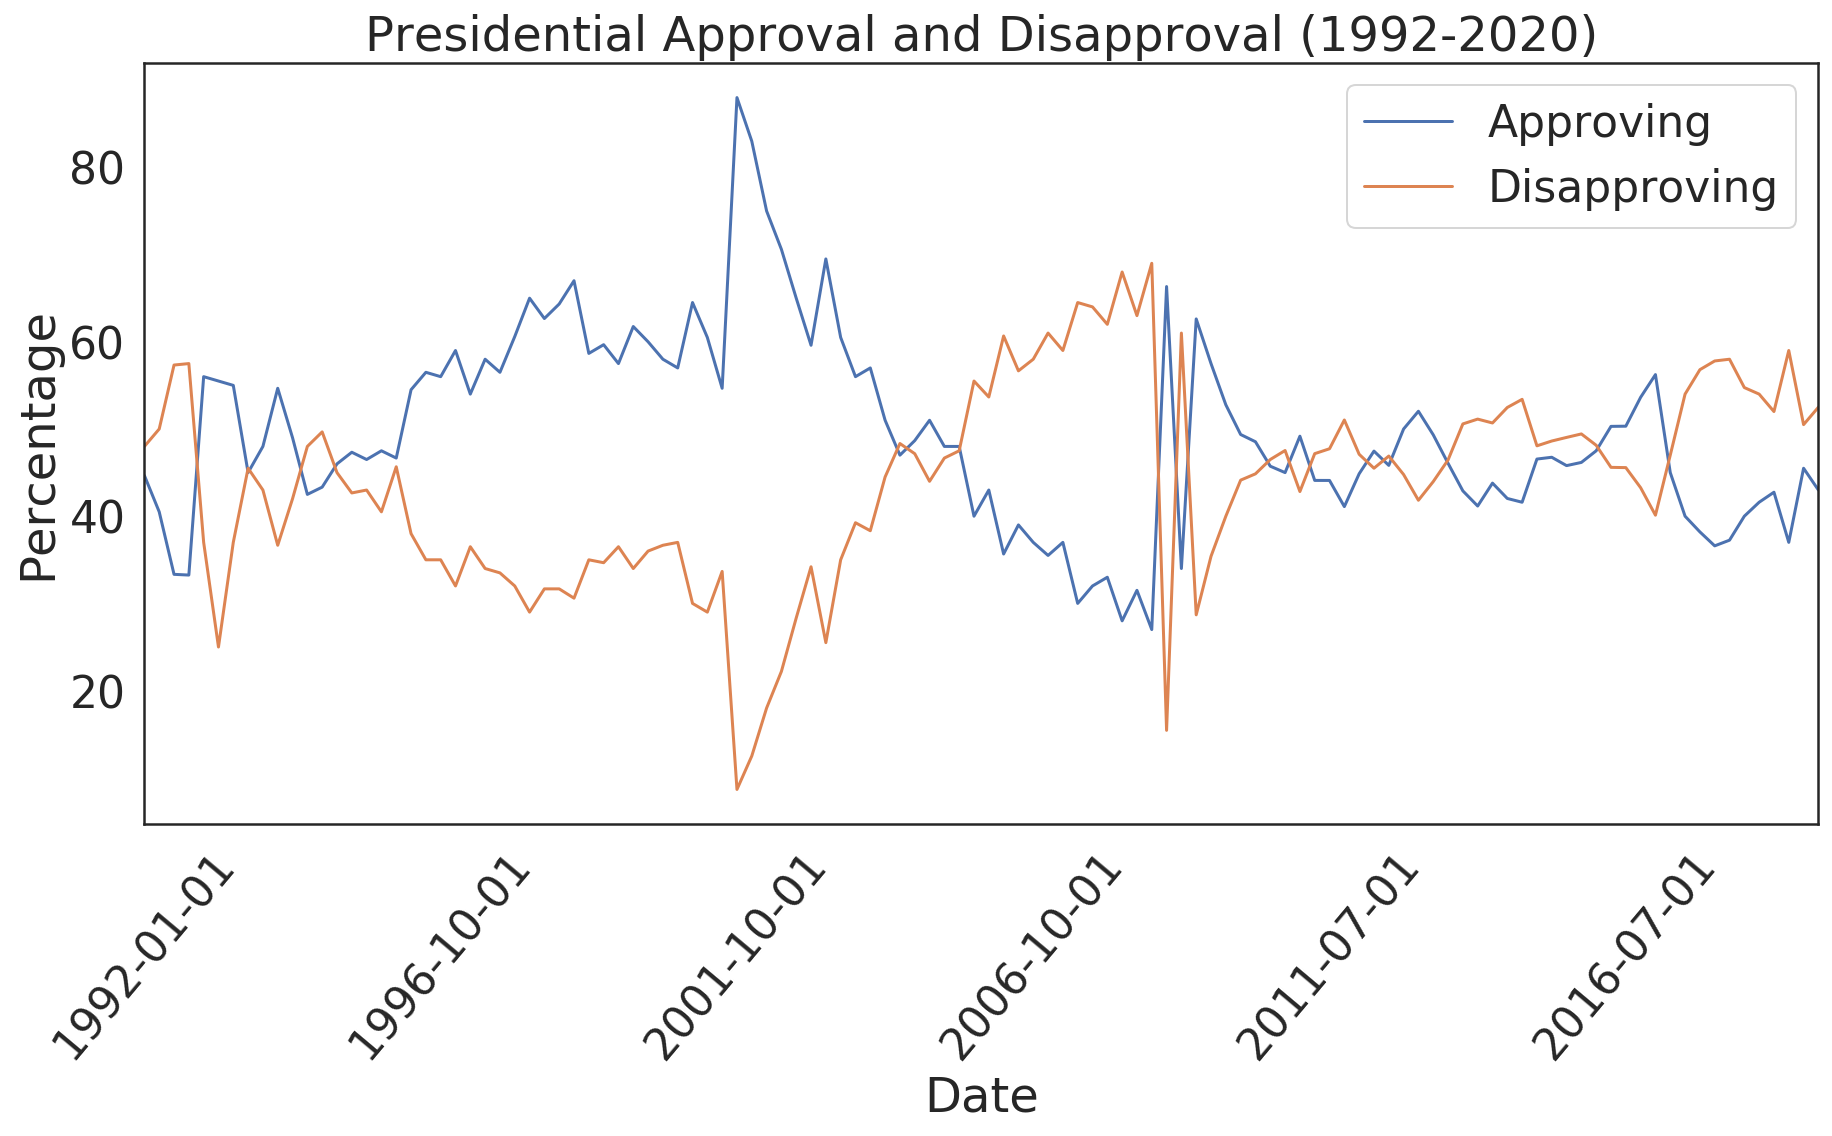

In [15]:
fig = df.plot.line(x='Date',y=['Billions_Dollars', 'Adjusted_Sales'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Public Spending in Billions of Dollars [Log]')
fig.set_title('Public Spending in Billions of Dollars (1992-2020)')

fig = df.plot.line(x='Date',y=['Approving', 'Disapproving'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Percentage')
fig.set_title('Presidential Approval and Disapproval (1992-2020)')

### Analysis Part 1: Work with the entire data set

#### Regression

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Presidential Disapproval Rating and Gov Public Spending Correlation (1992-2020)')

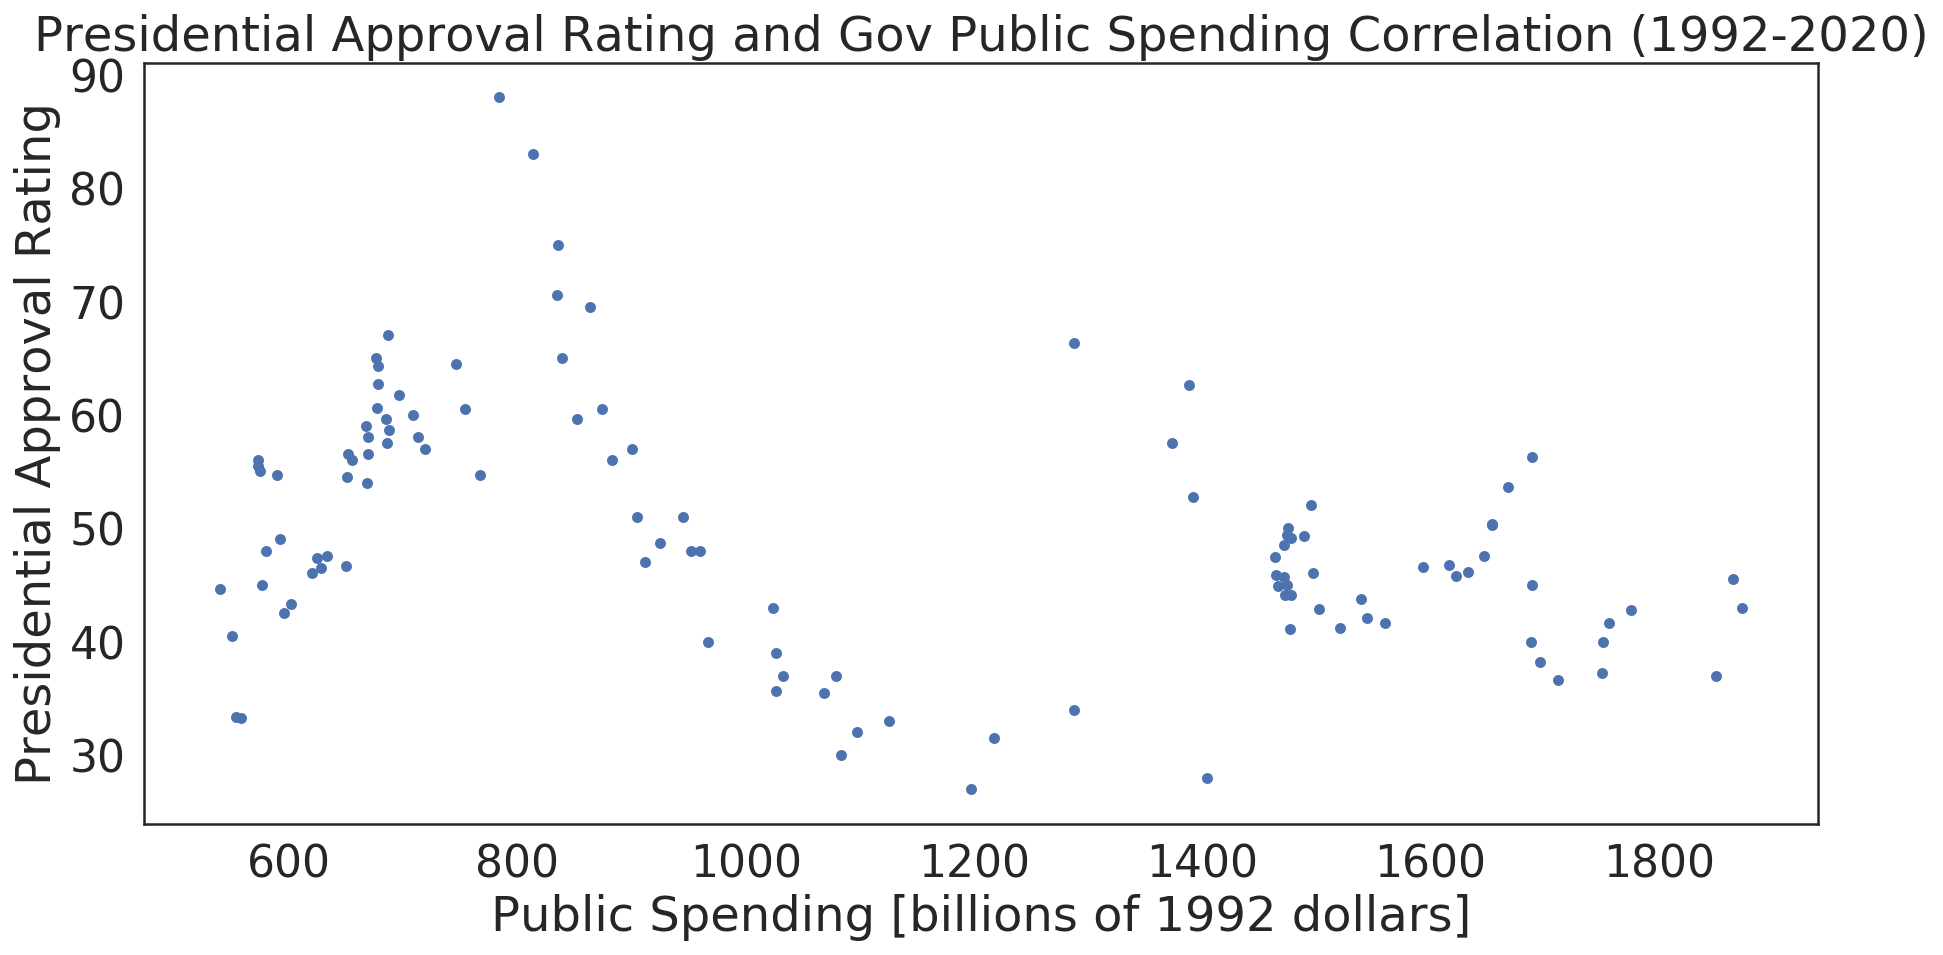

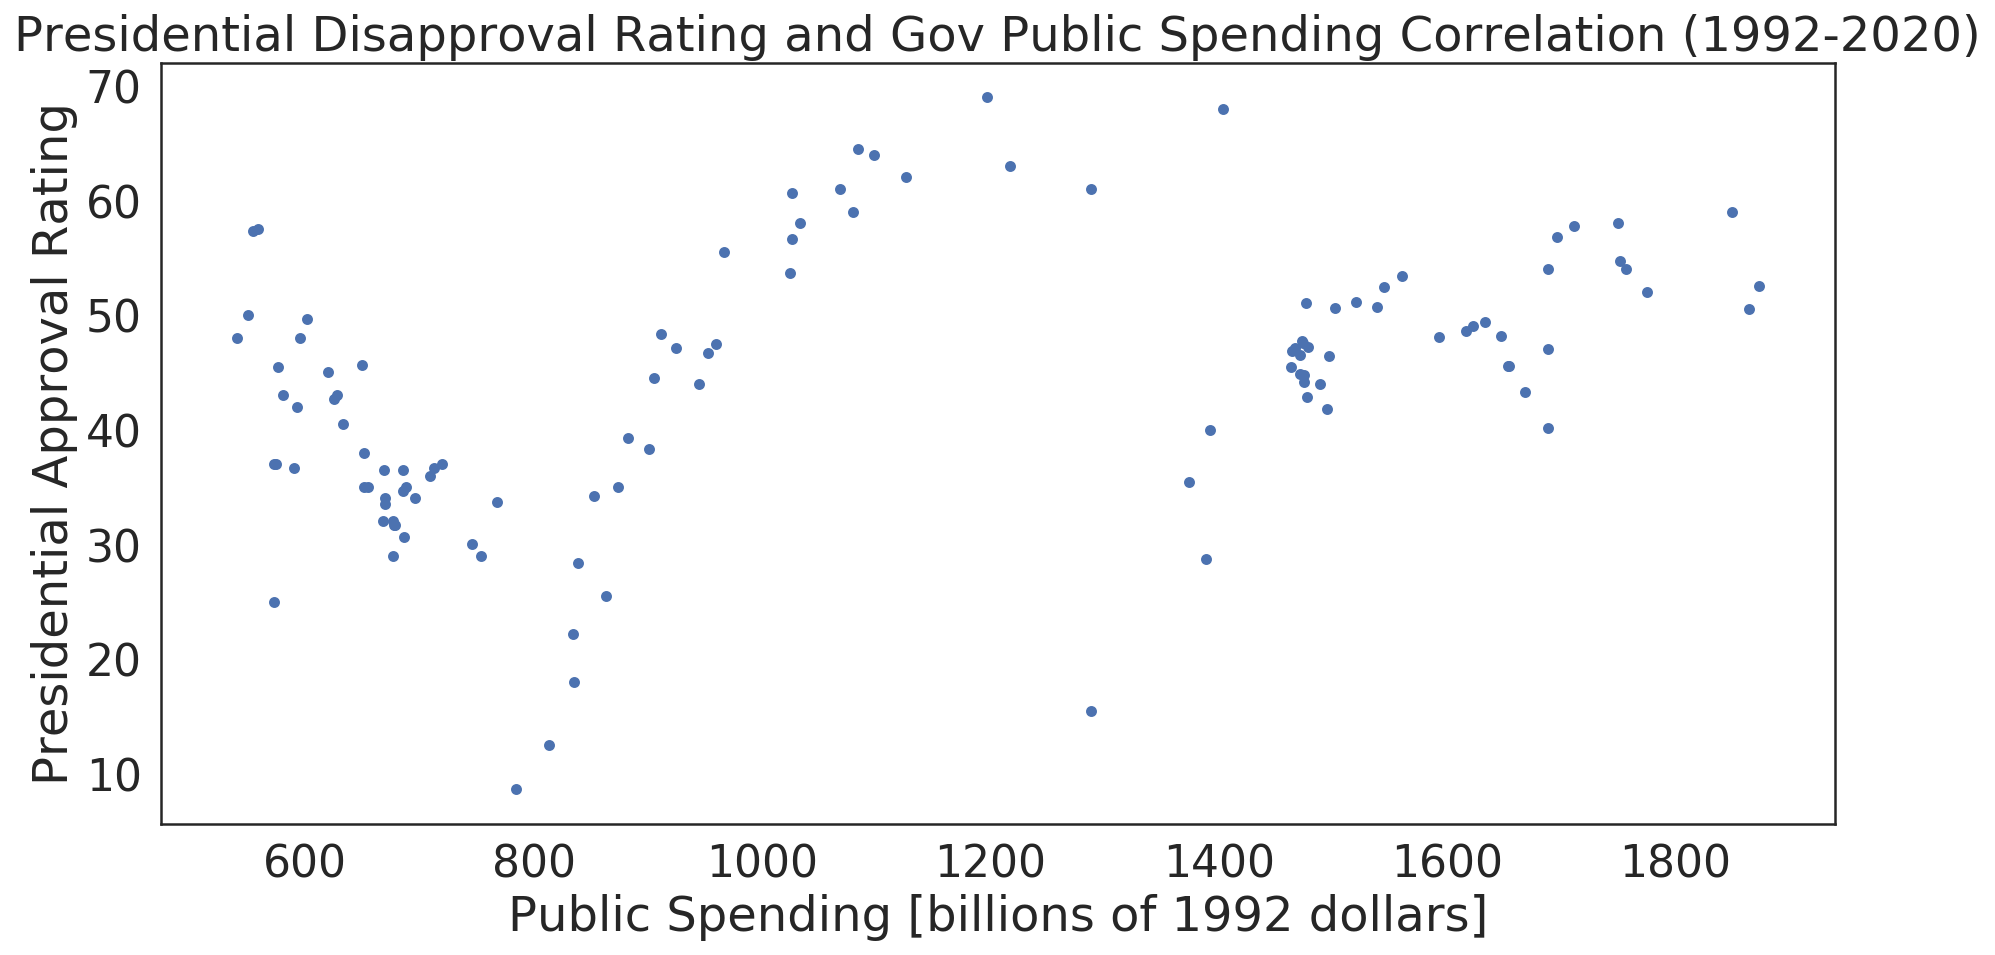

In [16]:
#Scatter Plot for Approval Ratings

fig = df.plot.scatter(x='Adjusted_Sales', y='Approving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (1992-2020)')

#Scatter Plot for Disapproval Ratings
fig = df.plot.scatter(x='Adjusted_Sales', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating')
fig.set_title('Presidential Disapproval Rating and Gov Public Spending Correlation (1992-2020)')

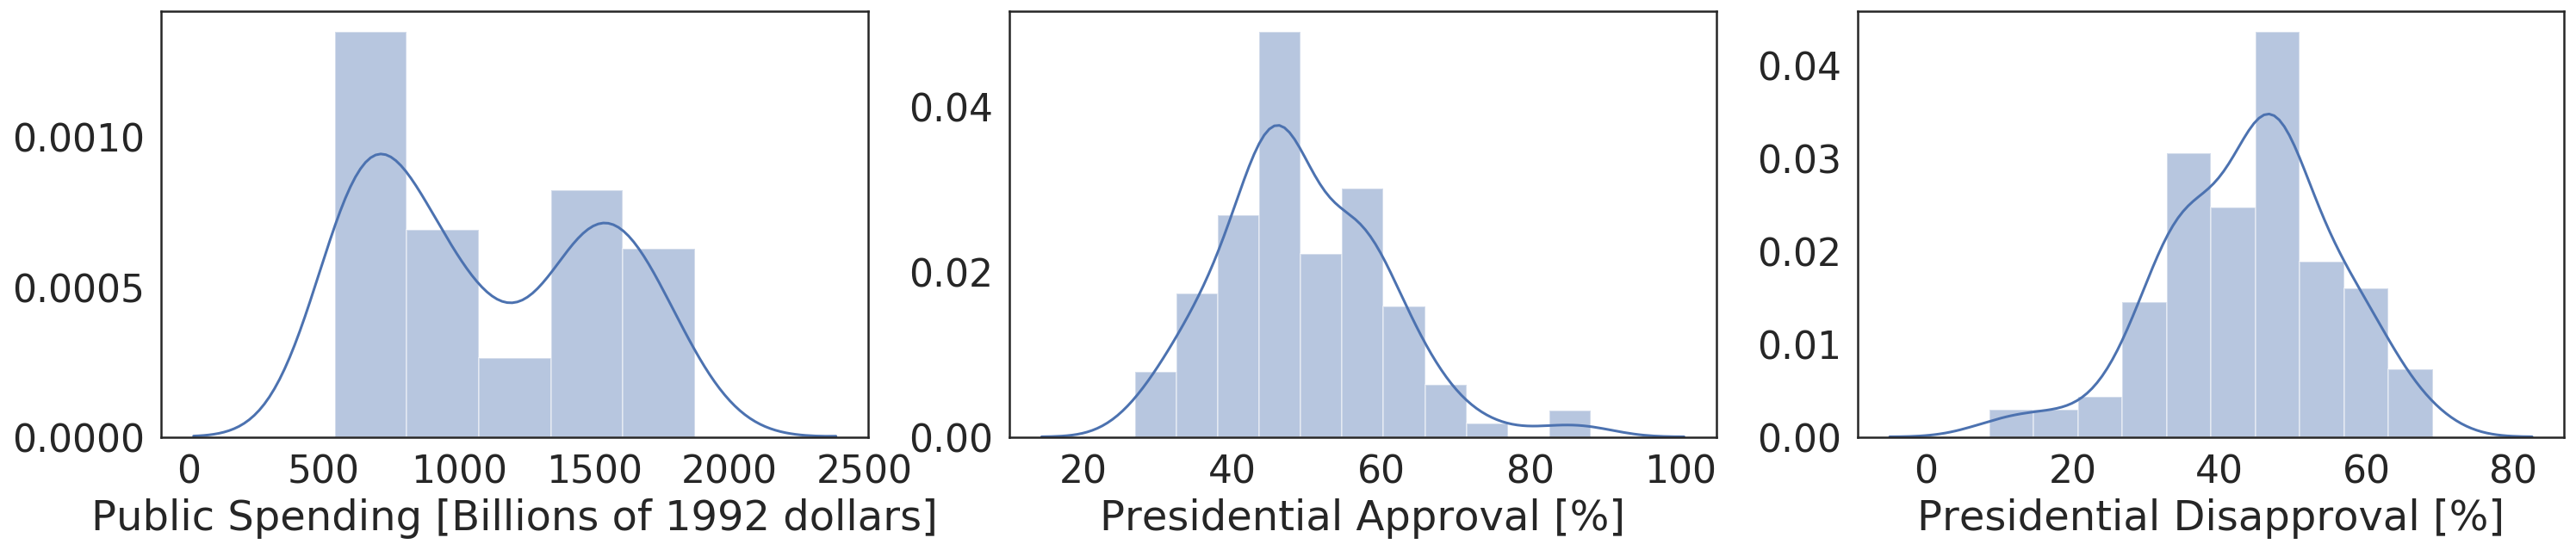

In [17]:
#Distplot for Adjusted Sales, Approval, Disapproval

plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df['Adjusted_Sales'])
plt.xlabel('Public Spending [Billions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df['Approving'])
plt.xlabel('Presidential Approval [%]');

plt.subplot(233)
sns.distplot(df['Disapproving'])
plt.xlabel('Presidential Disapproval [%]');

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     19.76
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           2.07e-05
Time:                        21:14:33   Log-Likelihood:                -424.80
No. Observations:                 114   AIC:                             853.6
Df Residuals:                     112   BIC:                             859.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         60.4792      2.642     22.

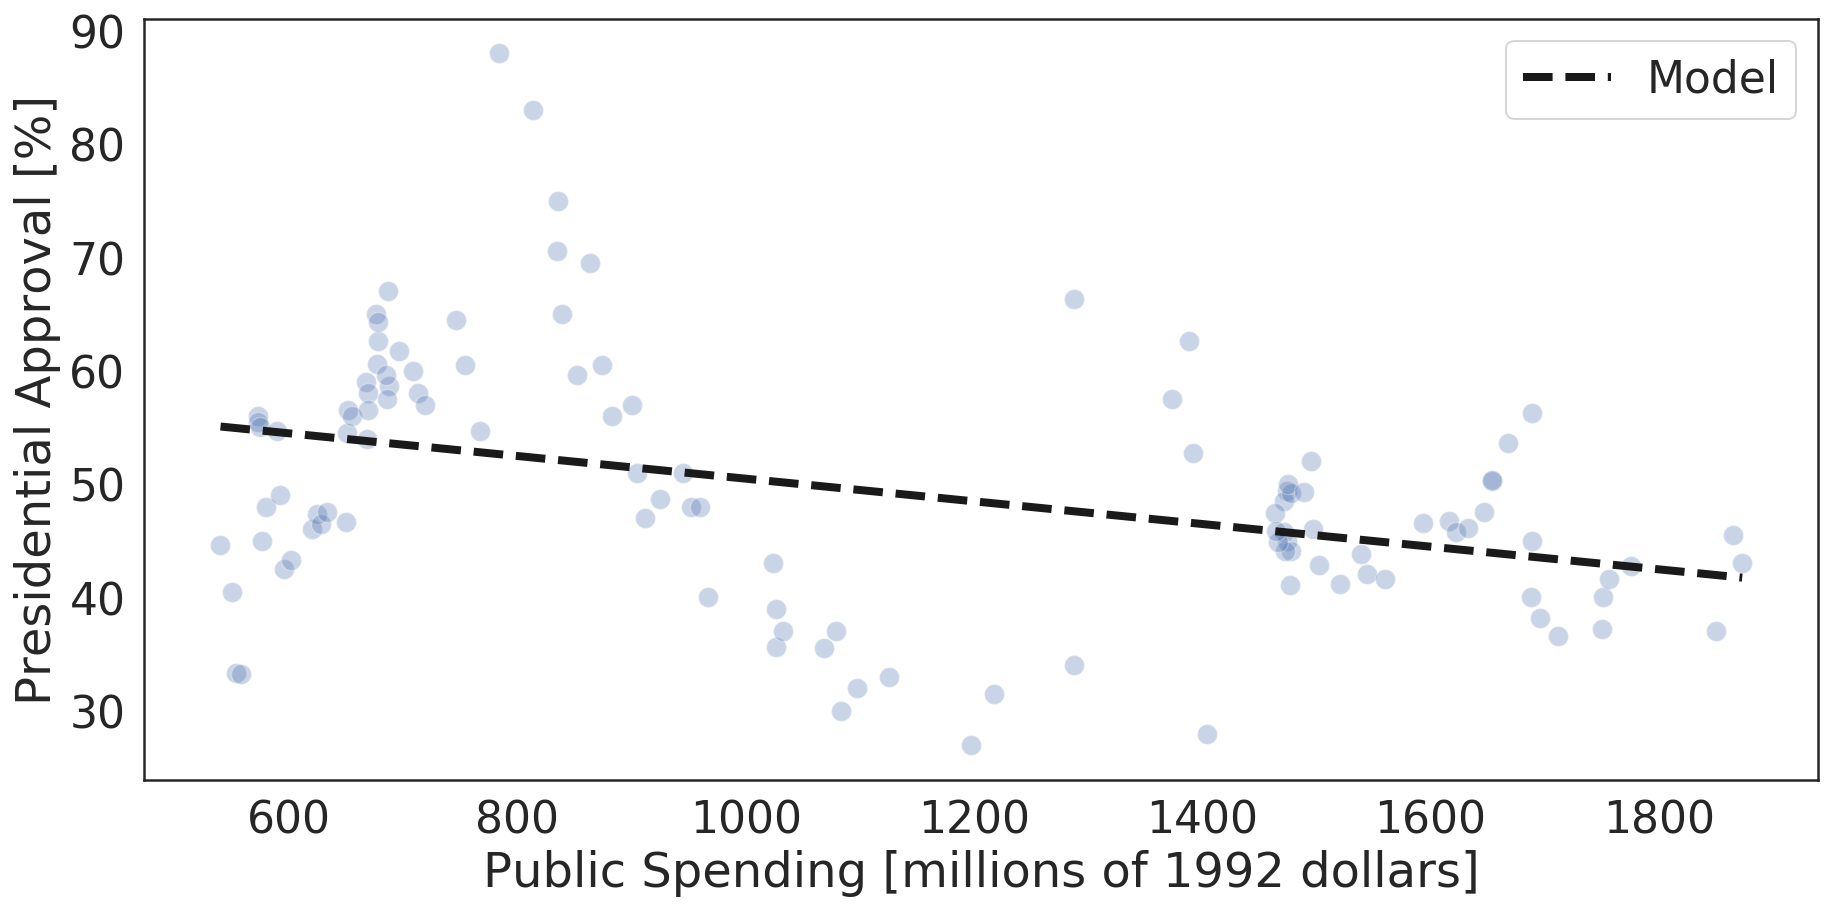

In [18]:
#OLS 

outcome, predictors = patsy.dmatrices('Approving ~ Adjusted_Sales', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

#Regression 

plt.figure(figsize=(15, 7))
sns.scatterplot(x='Adjusted_Sales', y='Approving', alpha=0.3, data=df, s=100)
xs = np.arange(df['Adjusted_Sales'].min(), df['Adjusted_Sales'].max())
ys = -0.0100  * xs + 60.4798
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('Public Spending [millions of 1992 dollars]')
plt.ylabel('Presidential Approval [%]')
plt.legend();

**This gave us some answers, but to dig deeper, we have to separate the data by each administration** 

Different presidents face different problems and economic conditions during their time as president. Different presidents also have differing levels of popularity. Completing these same analyses for each president individually may give us a clearer picture.

### Analysis Part 2: Breakdown by Administration

In [10]:
df_Clinton = df[df['President'] == 'Clinton']
df_Bush = df[df['President'] == 'GW Bush']
df_Obama= df[df['President'] == 'Obama']
df_Trump = df[df['President'] == 'Trump']

NameError: name 'df' is not defined

#### Clinton (1993-2000)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Presidential Approval Rating and Gov Public Spending Correlation (1993-2000)')

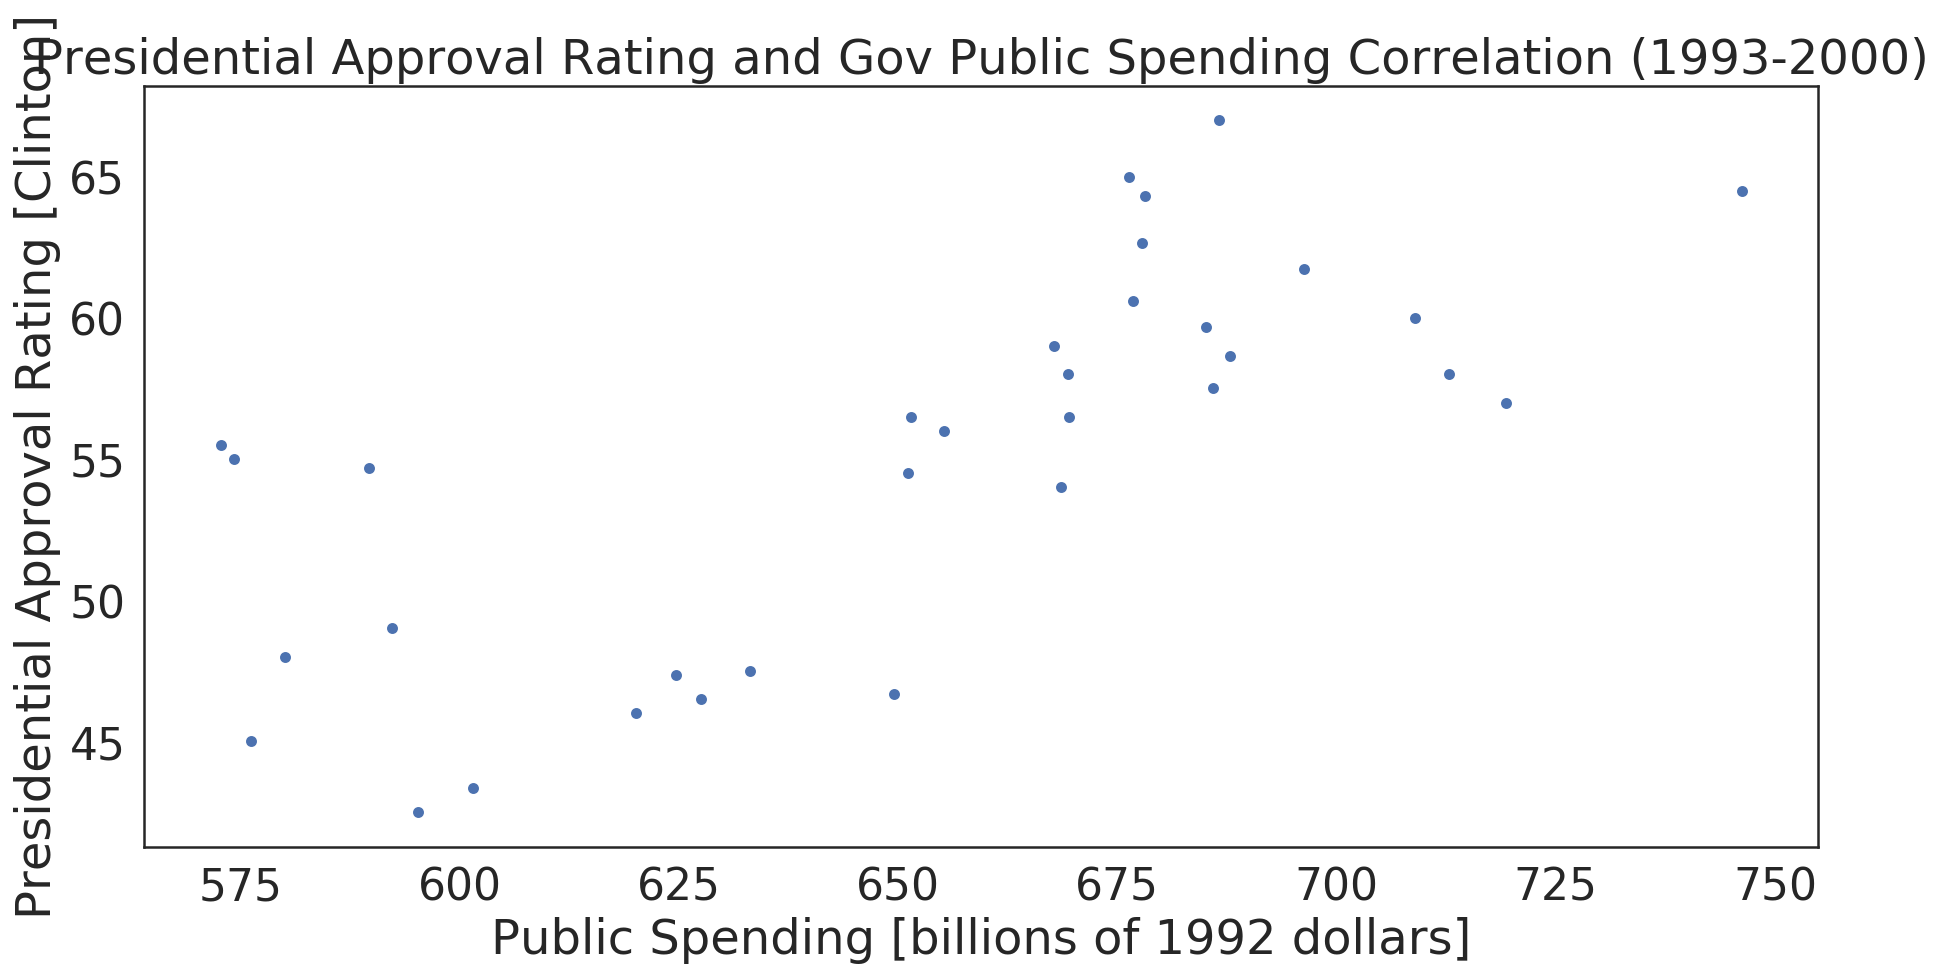

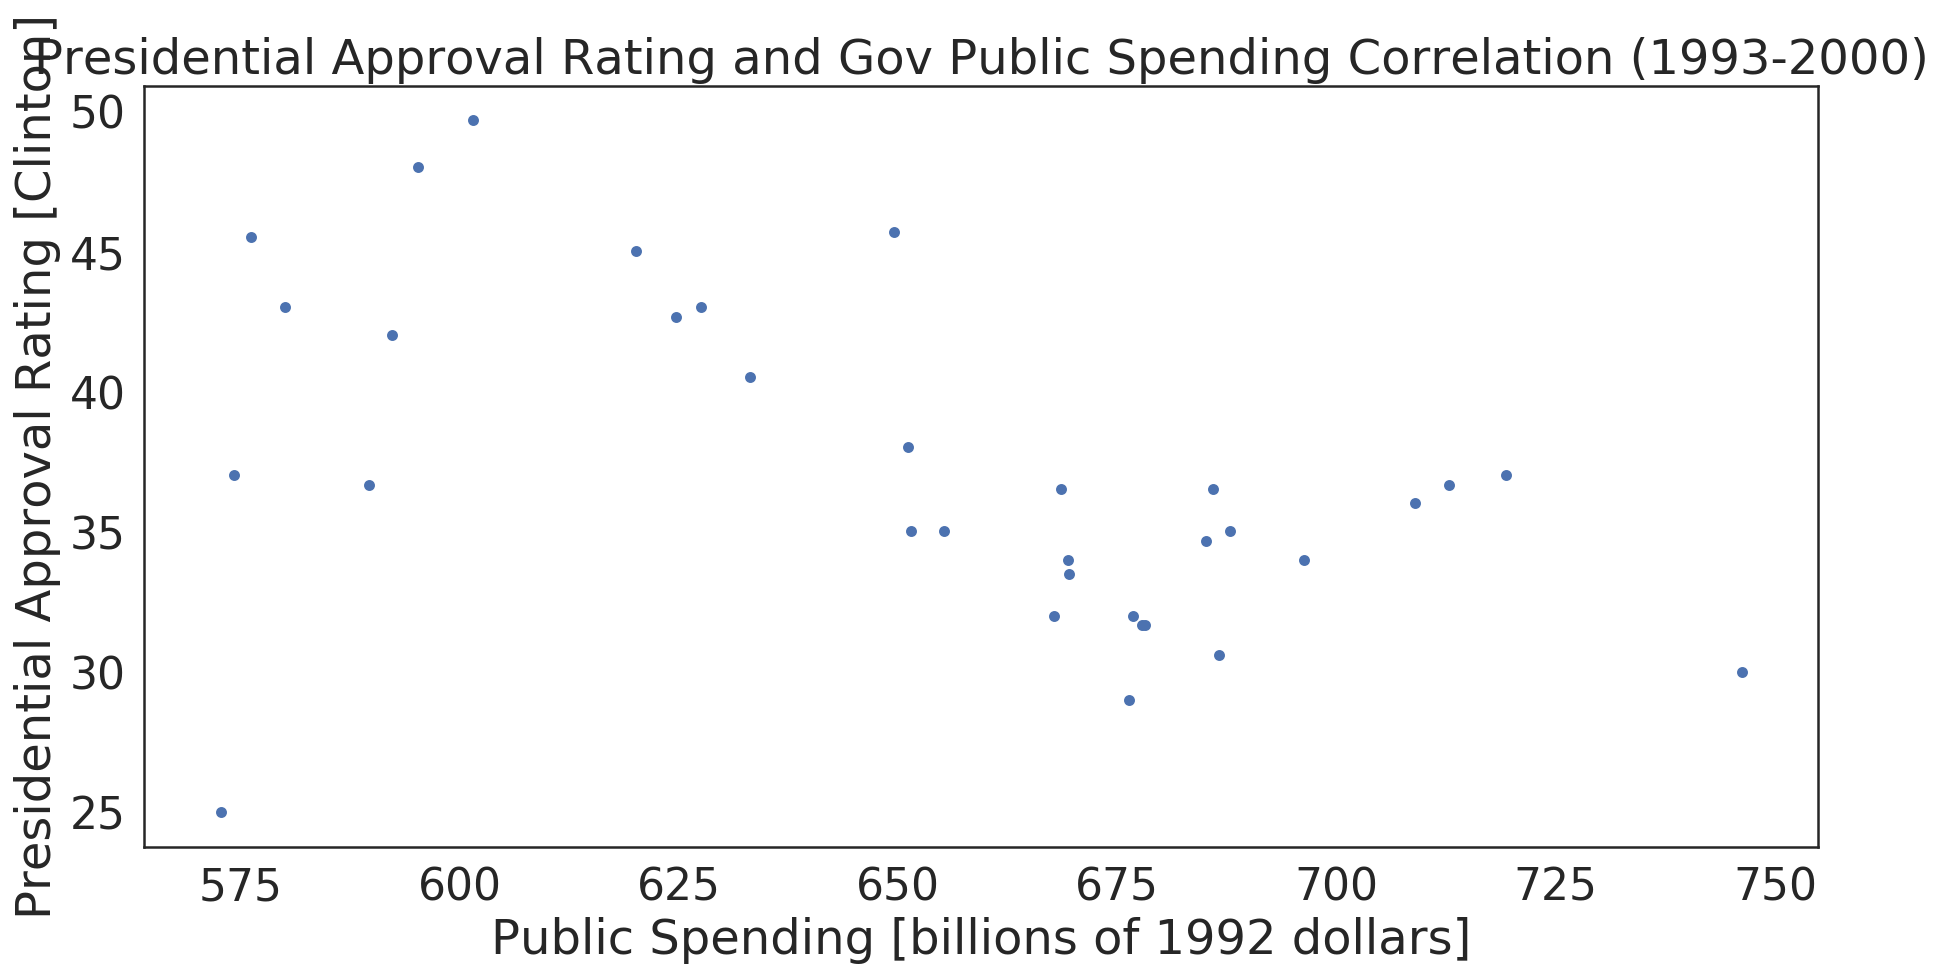

In [21]:
#Scatter Plot for Approval Ratings

fig = df_Clinton.plot.scatter(x='Adjusted_Sales', y='Approving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Clinton]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (1993-2000)')

#Scatter Plot for Disapproval Ratings

fig = df_Clinton.plot.scatter(x='Adjusted_Sales', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Clinton]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (1993-2000)')

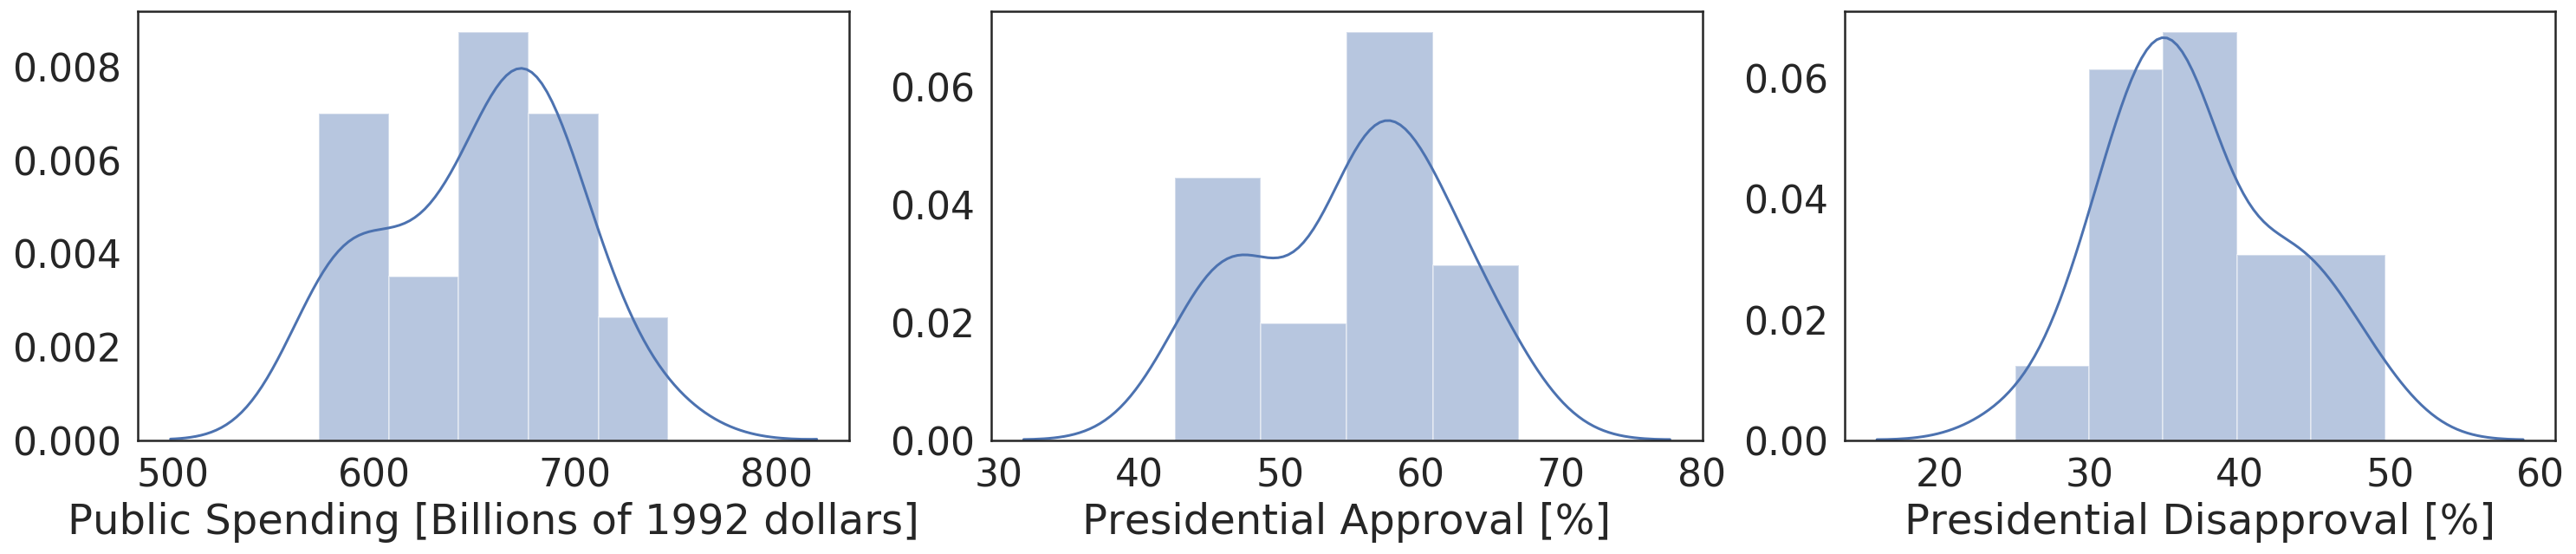

In [22]:
#Distplot for Adjusted Sales, Approval, Disapproval

plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df_Clinton['Adjusted_Sales'])
plt.xlabel('Public Spending [Billions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df_Clinton['Approving'])
plt.xlabel('Presidential Approval [%]');

plt.subplot(233)
sns.distplot(df_Clinton['Disapproving'])
plt.xlabel('Presidential Disapproval [%]');

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     32.74
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           2.71e-06
Time:                        21:14:54   Log-Likelihood:                -97.724
No. Observations:                  33   AIC:                             199.4
Df Residuals:                      31   BIC:                             202.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -12.9392     11.920     -1.

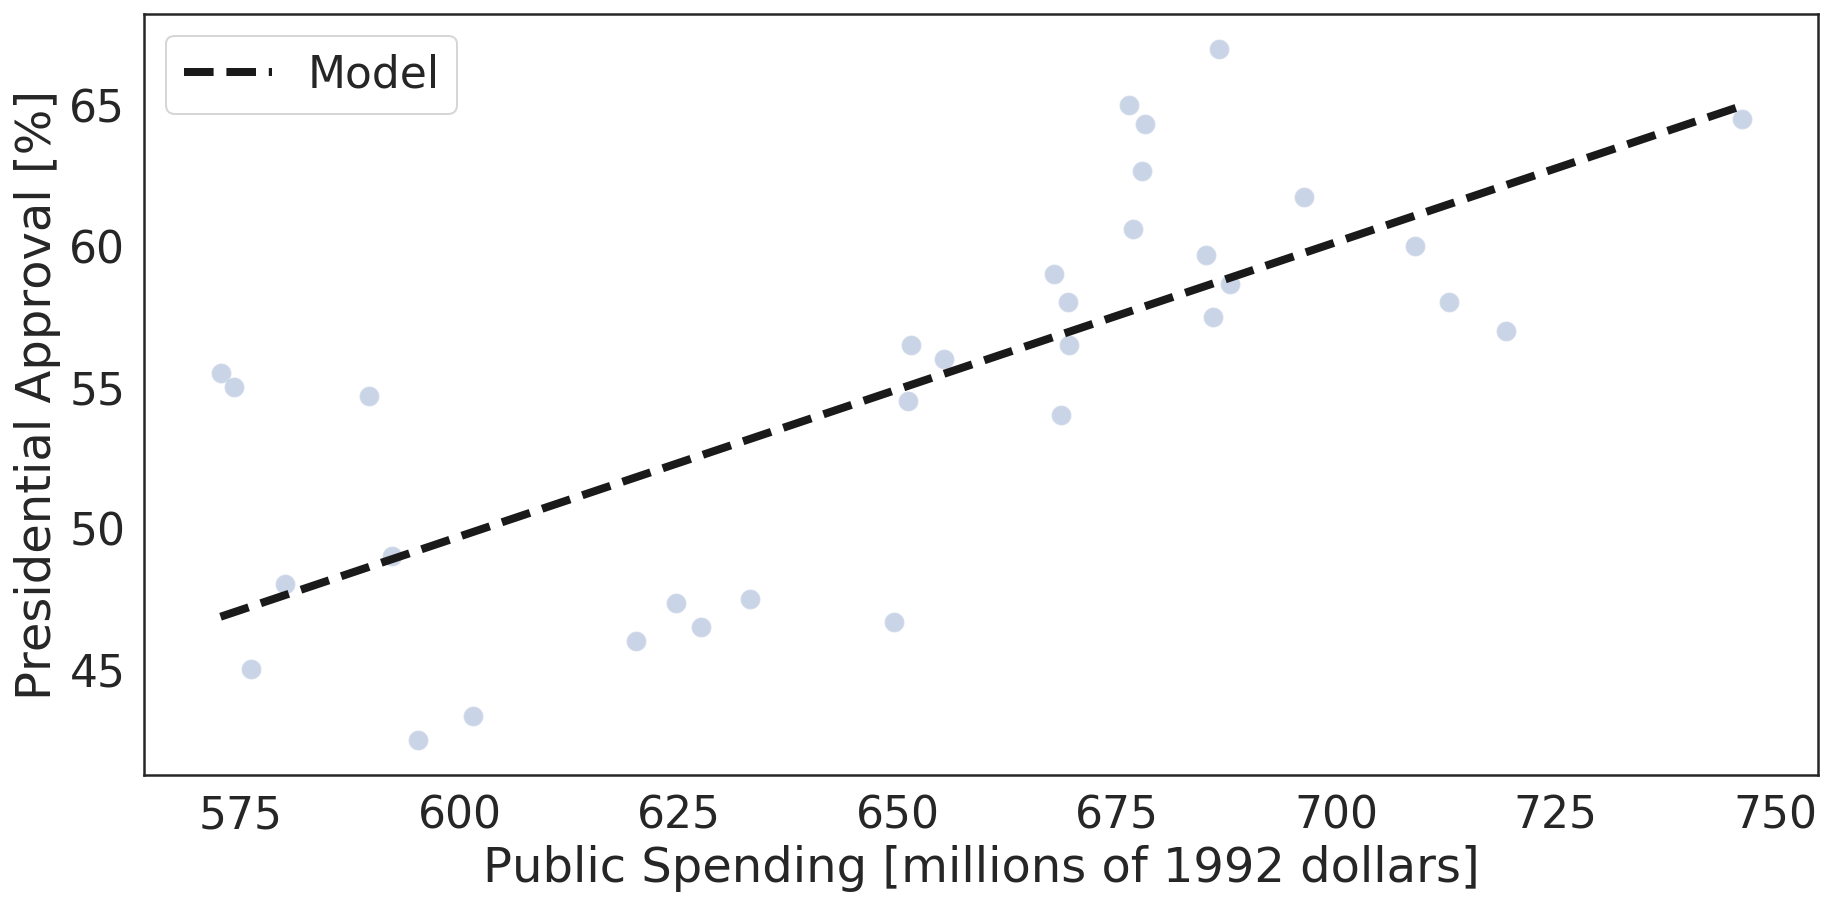

In [23]:
#OLS 

outcome, predictors = patsy.dmatrices('Approving ~ Adjusted_Sales', df_Clinton)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

#Regression 

plt.figure(figsize=(15, 7))
sns.scatterplot(x='Adjusted_Sales', y='Approving', alpha=0.3, data=df_Clinton, s=100)
xs = np.arange(df_Clinton['Adjusted_Sales'].min(), df_Clinton['Adjusted_Sales'].max())
ys = .1044  * xs - 12.9392
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('Public Spending [millions of 1992 dollars]')
plt.ylabel('Presidential Approval [%]')
plt.legend();

#### Bush (2001-2008)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Presidential Approval Rating and Gov Public Spending Correlation (2001-2008)')

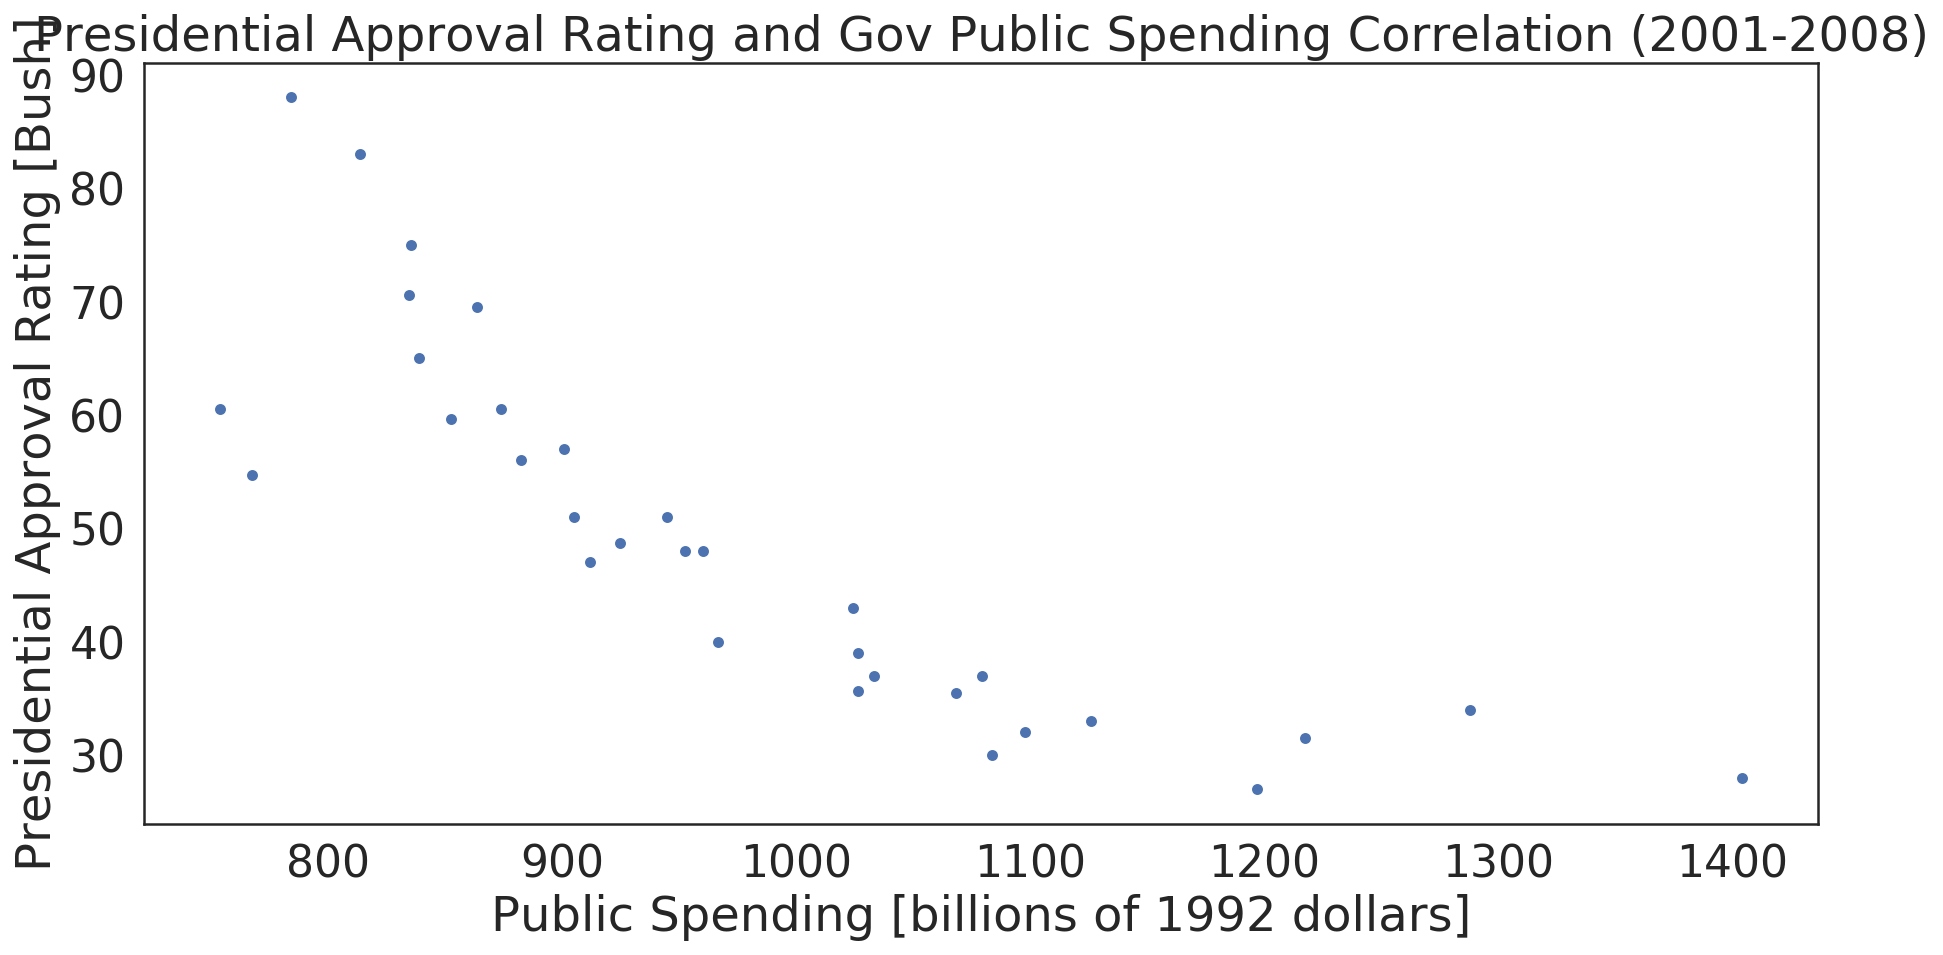

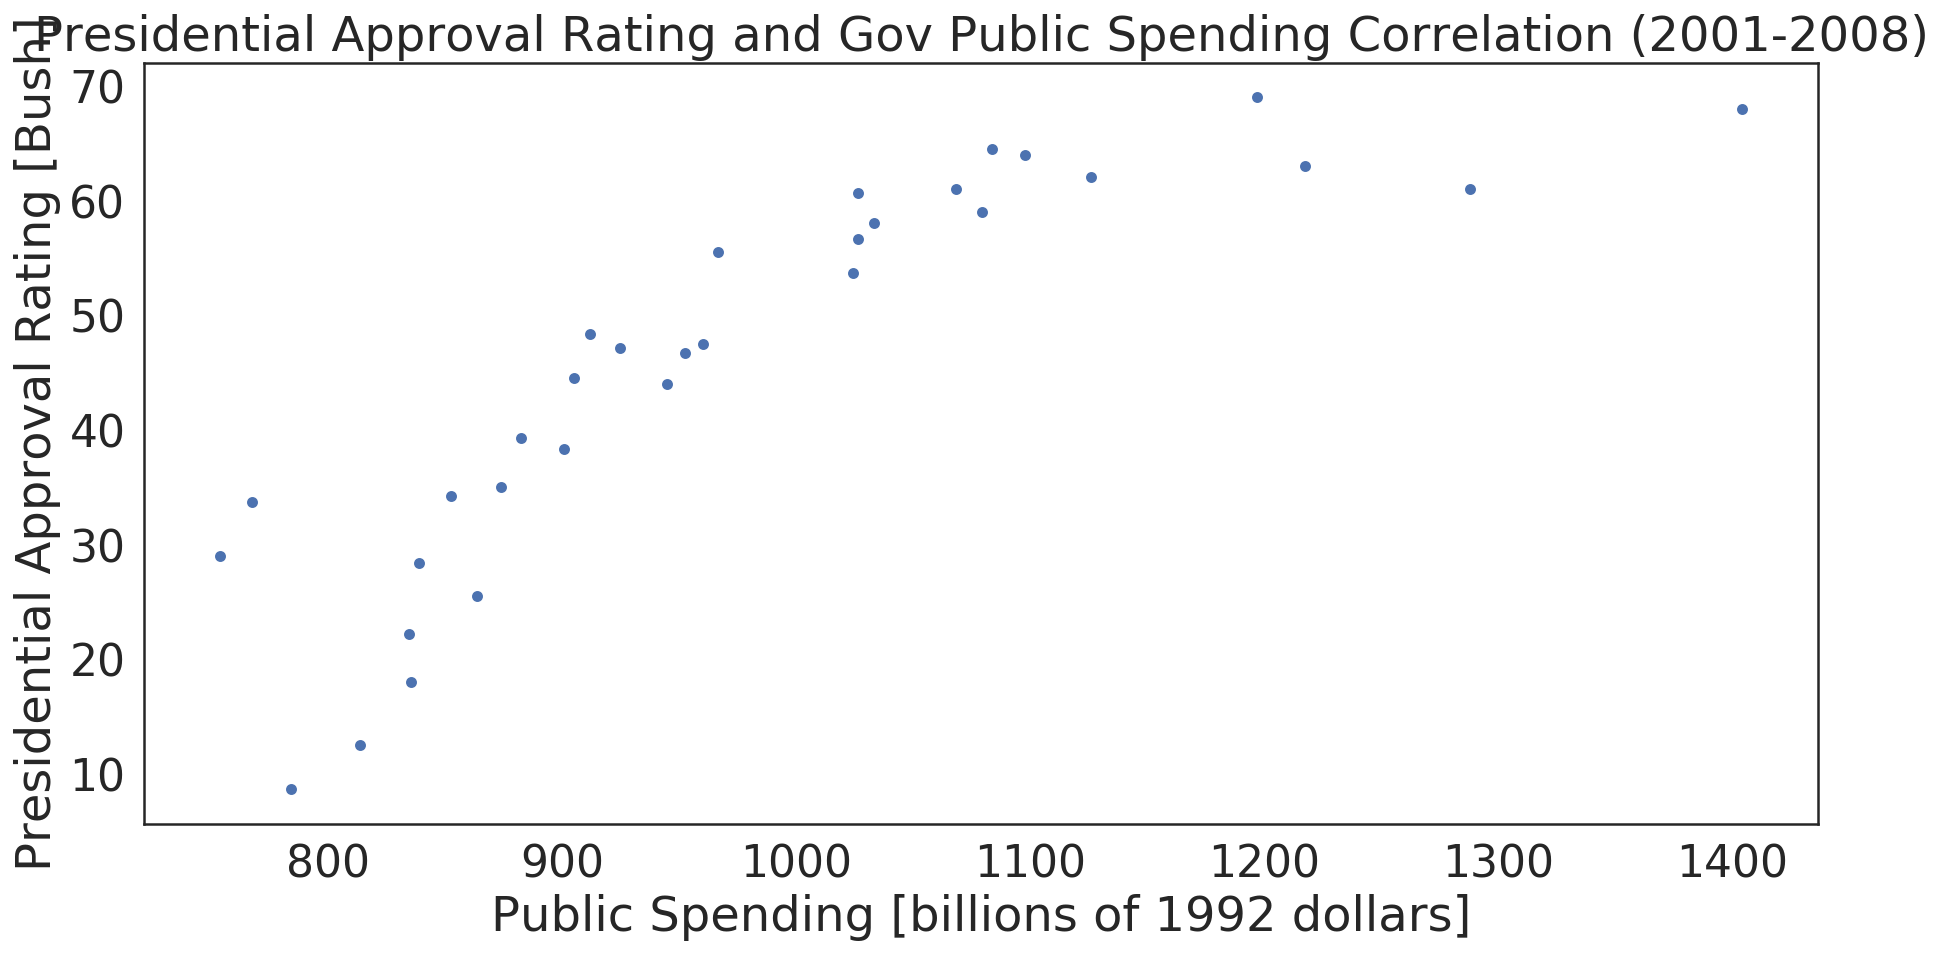

In [24]:
#Scatter Plot for Approval Ratings

fig = df_Bush.plot.scatter(x='Adjusted_Sales', y='Approving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Bush]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (2001-2008)')

#Scatter Plot for Disapproval Ratings

fig = df_Bush.plot.scatter(x='Adjusted_Sales', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Bush]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (2001-2008)')

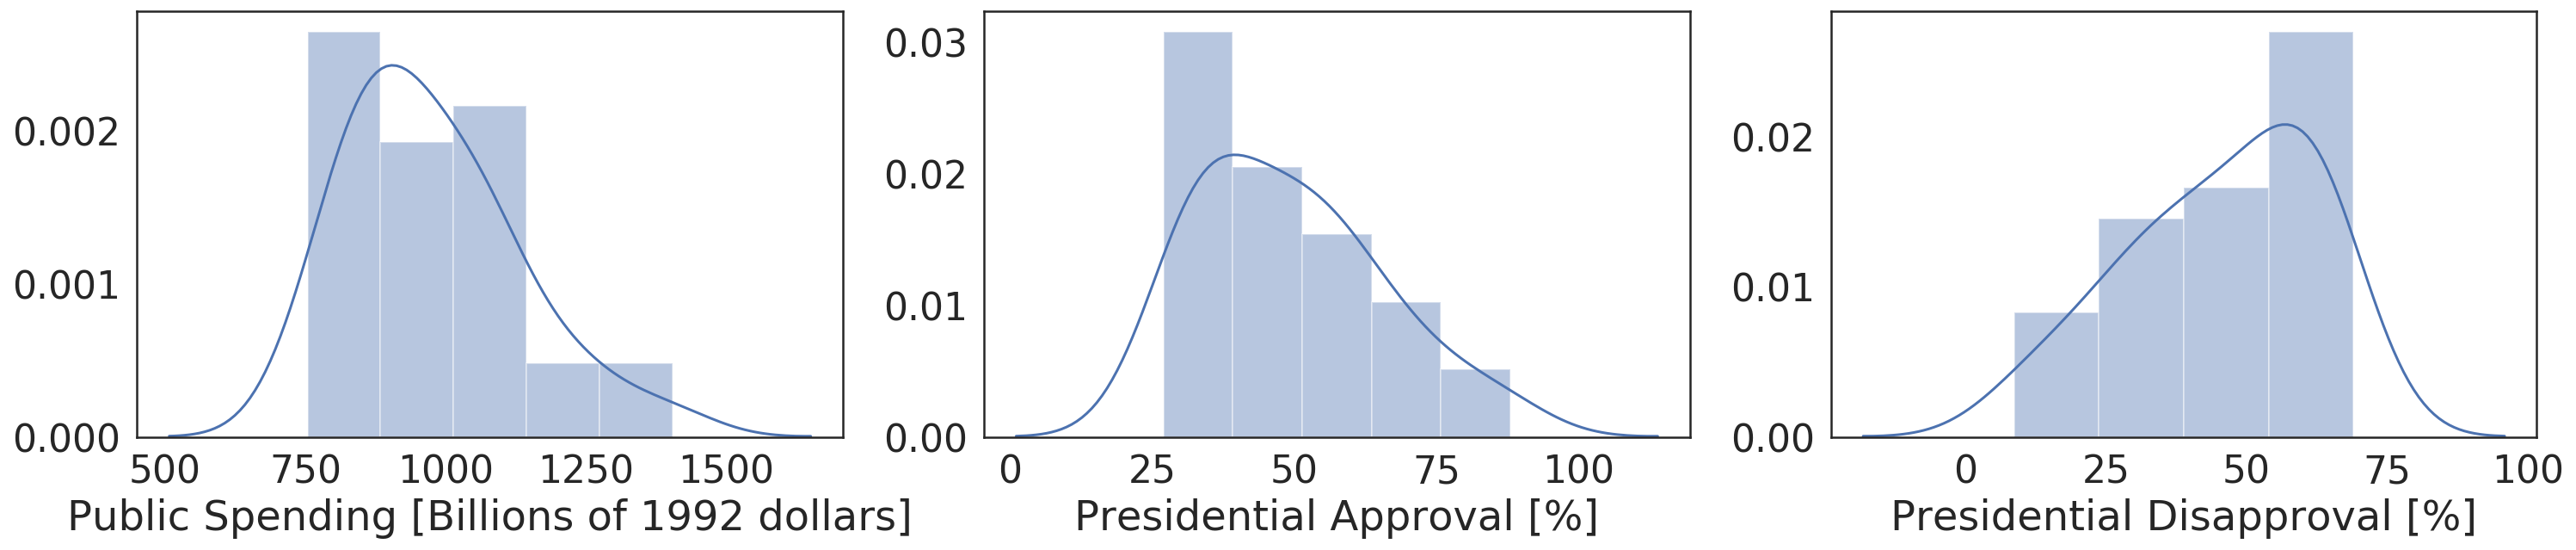

In [25]:
#Distplot for Adjusted Sales, Approval, Disapproval

plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df_Bush['Adjusted_Sales'])
plt.xlabel('Public Spending [Billions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df_Bush['Approving'])
plt.xlabel('Presidential Approval [%]');

plt.subplot(233)
sns.distplot(df_Bush['Disapproving'])
plt.xlabel('Presidential Disapproval [%]');

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     68.61
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           3.02e-09
Time:                        21:15:01   Log-Likelihood:                -115.22
No. Observations:                  32   AIC:                             234.4
Df Residuals:                      30   BIC:                             237.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        134.8418     10.460     12.

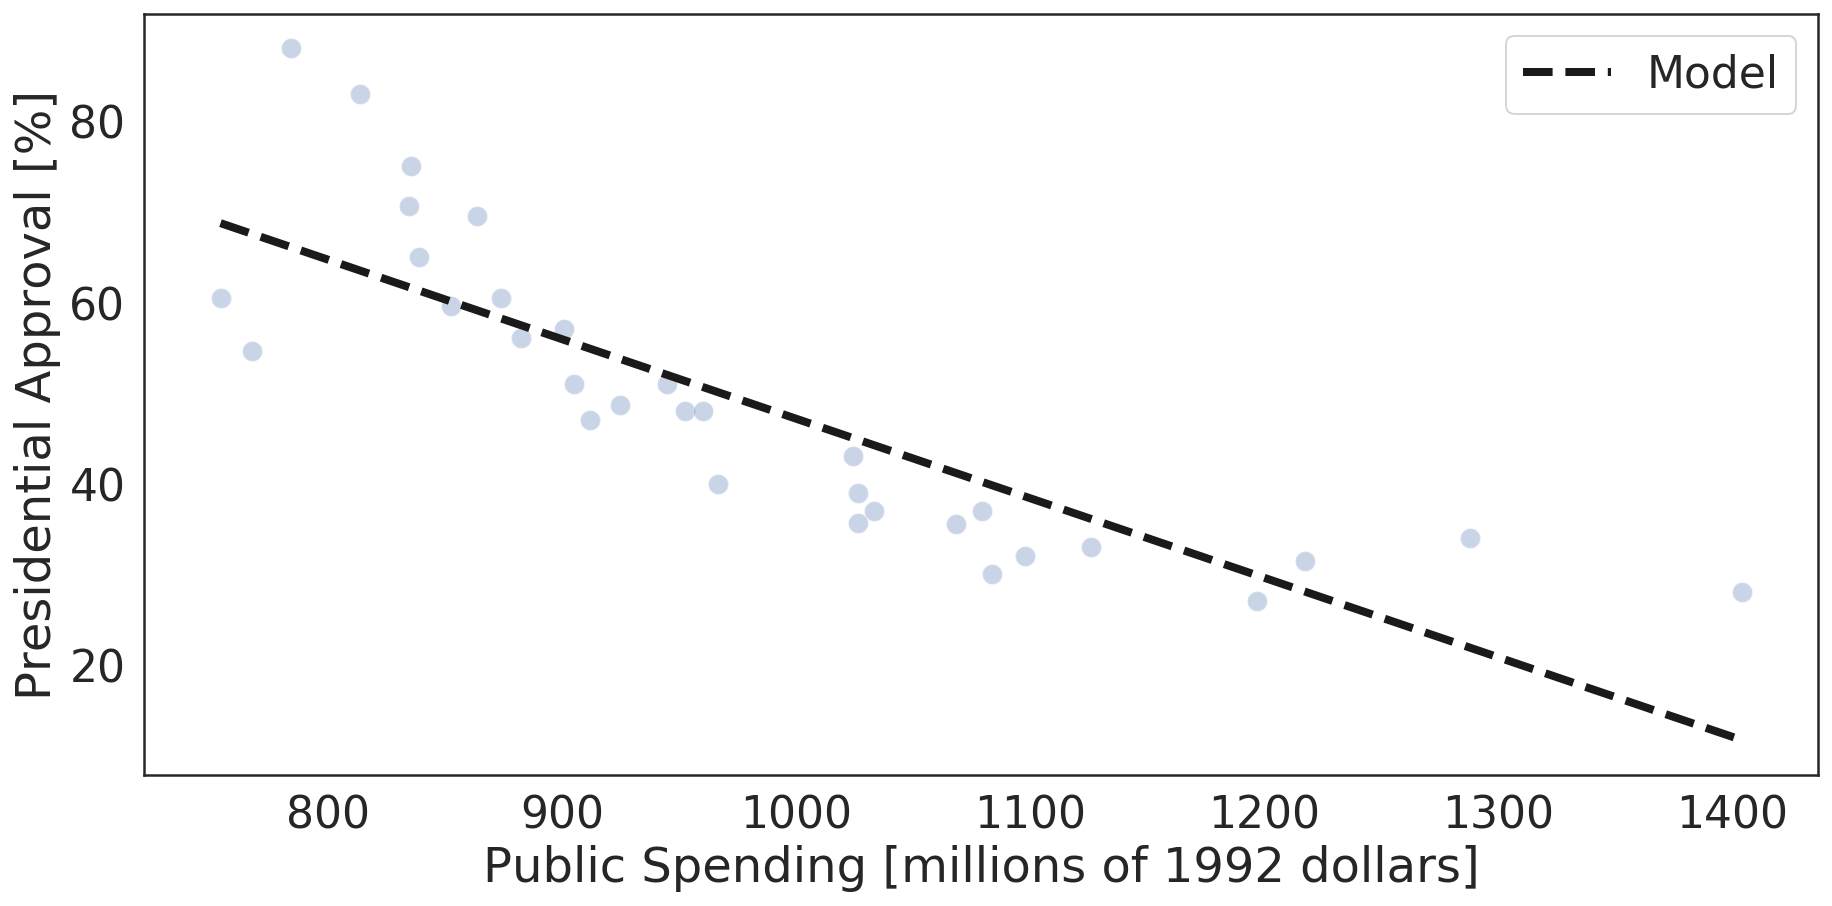

In [26]:
#OLS 

outcome, predictors = patsy.dmatrices('Approving ~ Adjusted_Sales', df_Bush)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

#Regression 

plt.figure(figsize=(15, 7))
sns.scatterplot(x='Adjusted_Sales', y='Approving', alpha=0.3, data=df_Bush, s=100)
xs = np.arange(df_Bush['Adjusted_Sales'].min(), df_Bush['Adjusted_Sales'].max())
ys = -.0877  * xs + 134.8418
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('Public Spending [millions of 1992 dollars]')
plt.ylabel('Presidential Approval [%]')
plt.legend();

#### Obama (2009-2016)

In [8]:
#Scatter Plot for Approval Ratings

fig = df_Obama.plot.scatter(x='Adjusted_Sales', y='Approving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Obama]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (2009-2016)')

#Scatter Plot for Disapproval Ratings

fig = df_Bush.plot.scatter(x='Adjusted_Sales', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Public Spending [billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Obama]')
fig.set_title('Presidential Approval Rating and Gov Public Spending Correlation (2009-2016)')

NameError: name 'df_Obama' is not defined

NameError: name 'df_Obama' is not defined

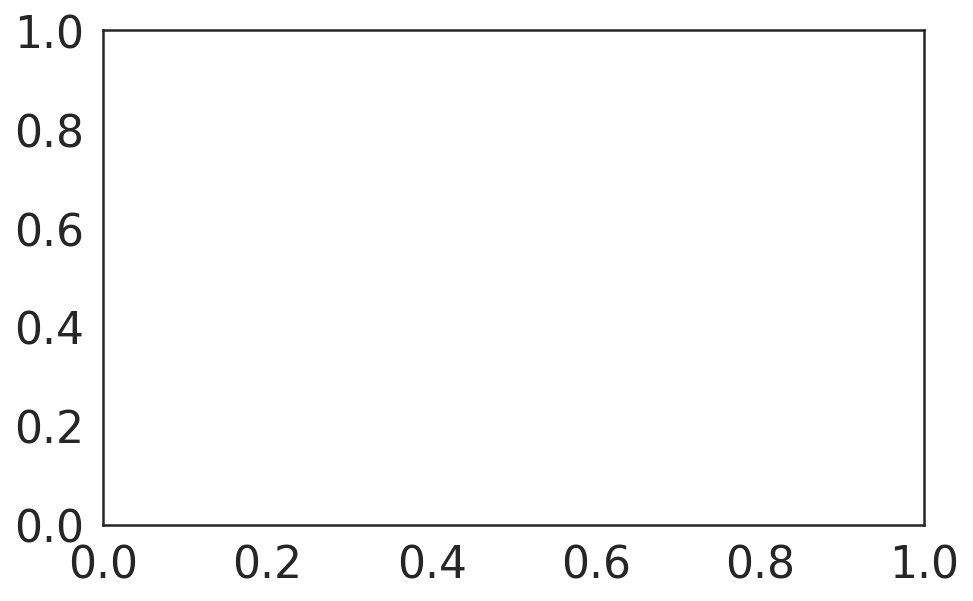

In [9]:
#Distplot for Adjusted Sales, Approval, Disapproval

plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df_Obama['Adjusted_Sales'])
plt.xlabel('Public Spending [Billions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df_Obama['Approving'])
plt.xlabel('Presidential Approval [%]');

plt.subplot(233)
sns.distplot(df_Obama['Disapproving'])
plt.xlabel('Presidential Disapproval [%]');

In [7]:
#OLS 

outcome, predictors = patsy.dmatrices('Approving ~ Adjusted_Sales', df_Obama)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

#Regression 

plt.figure(figsize=(15, 7))
sns.scatterplot(x='Adjusted_Sales', y='Approving', alpha=0.3, data=df_Obama, s=100)
xs = np.arange(df_Obama['Adjusted_Sales'].min(), df_Obama['Adjusted_Sales'].max())
ys = -.0196  * xs + 78.1168
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('Public Spending [millions of 1992 dollars]')
plt.ylabel('Presidential Approval [%]')
plt.legend();

NameError: name 'df_Obama' is not defined

#### Trump (2017-Present)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Presidential Approval Rating and Government Social Benefits (2017-2019)')

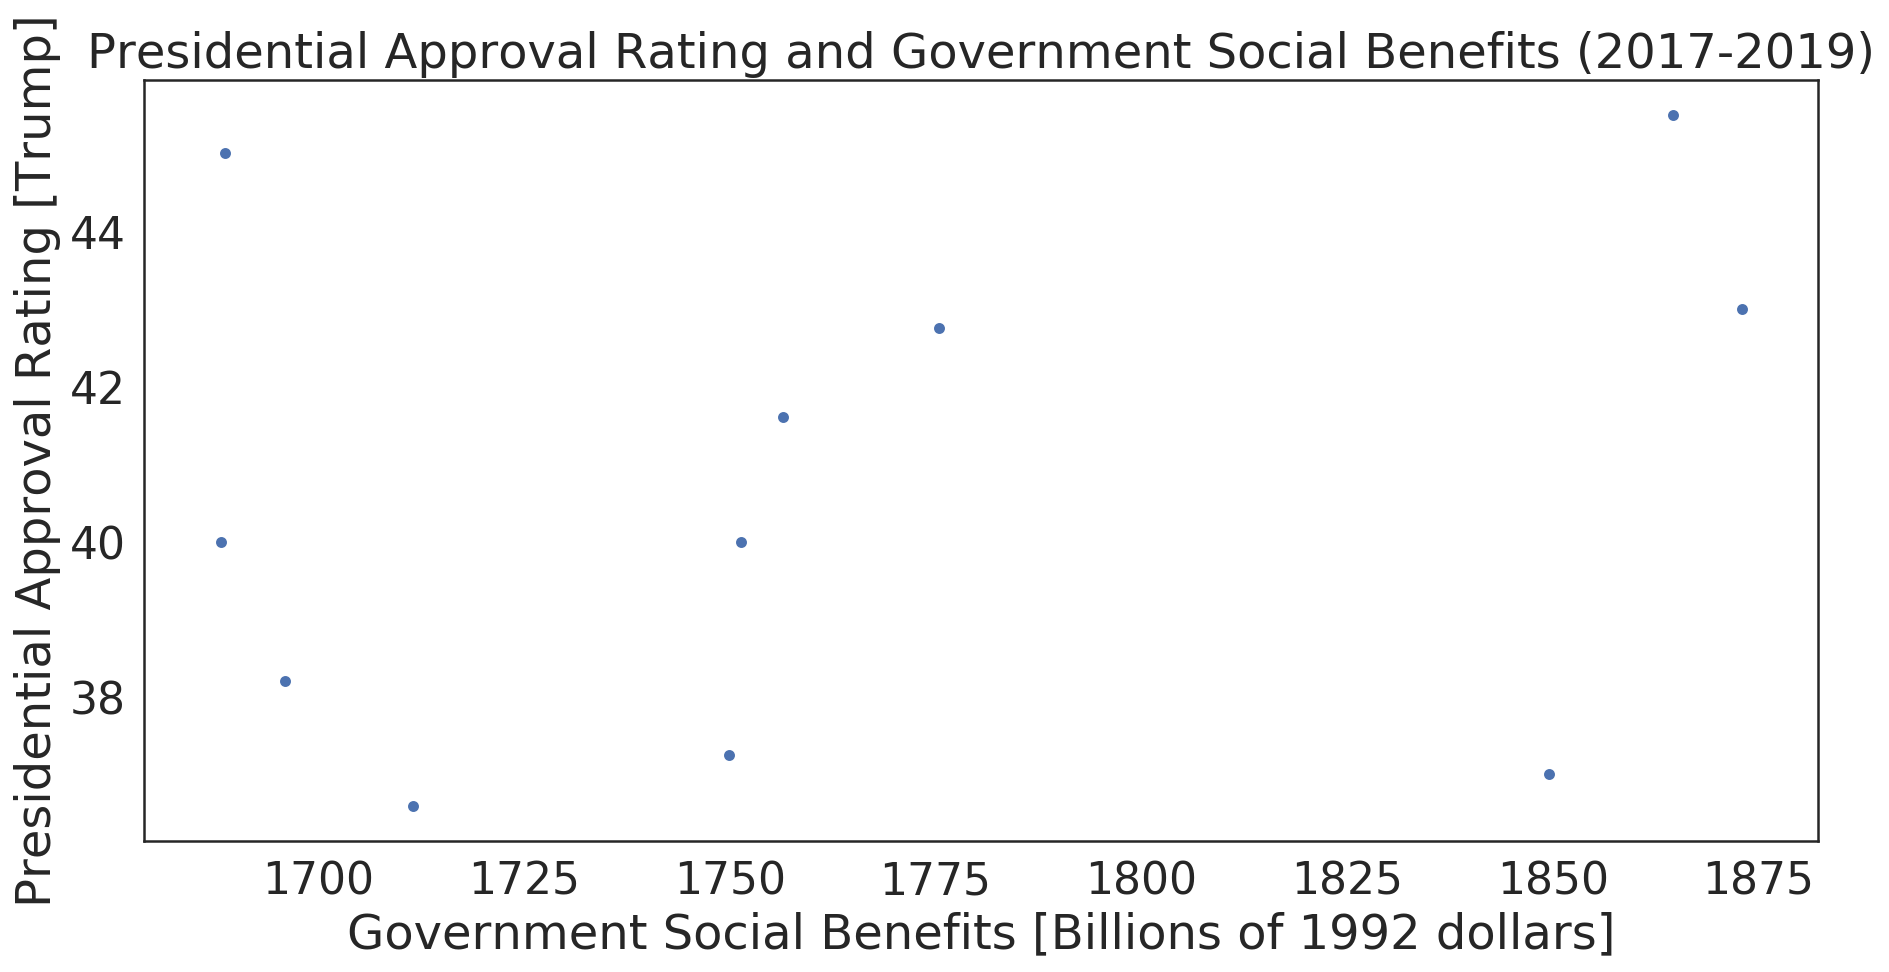

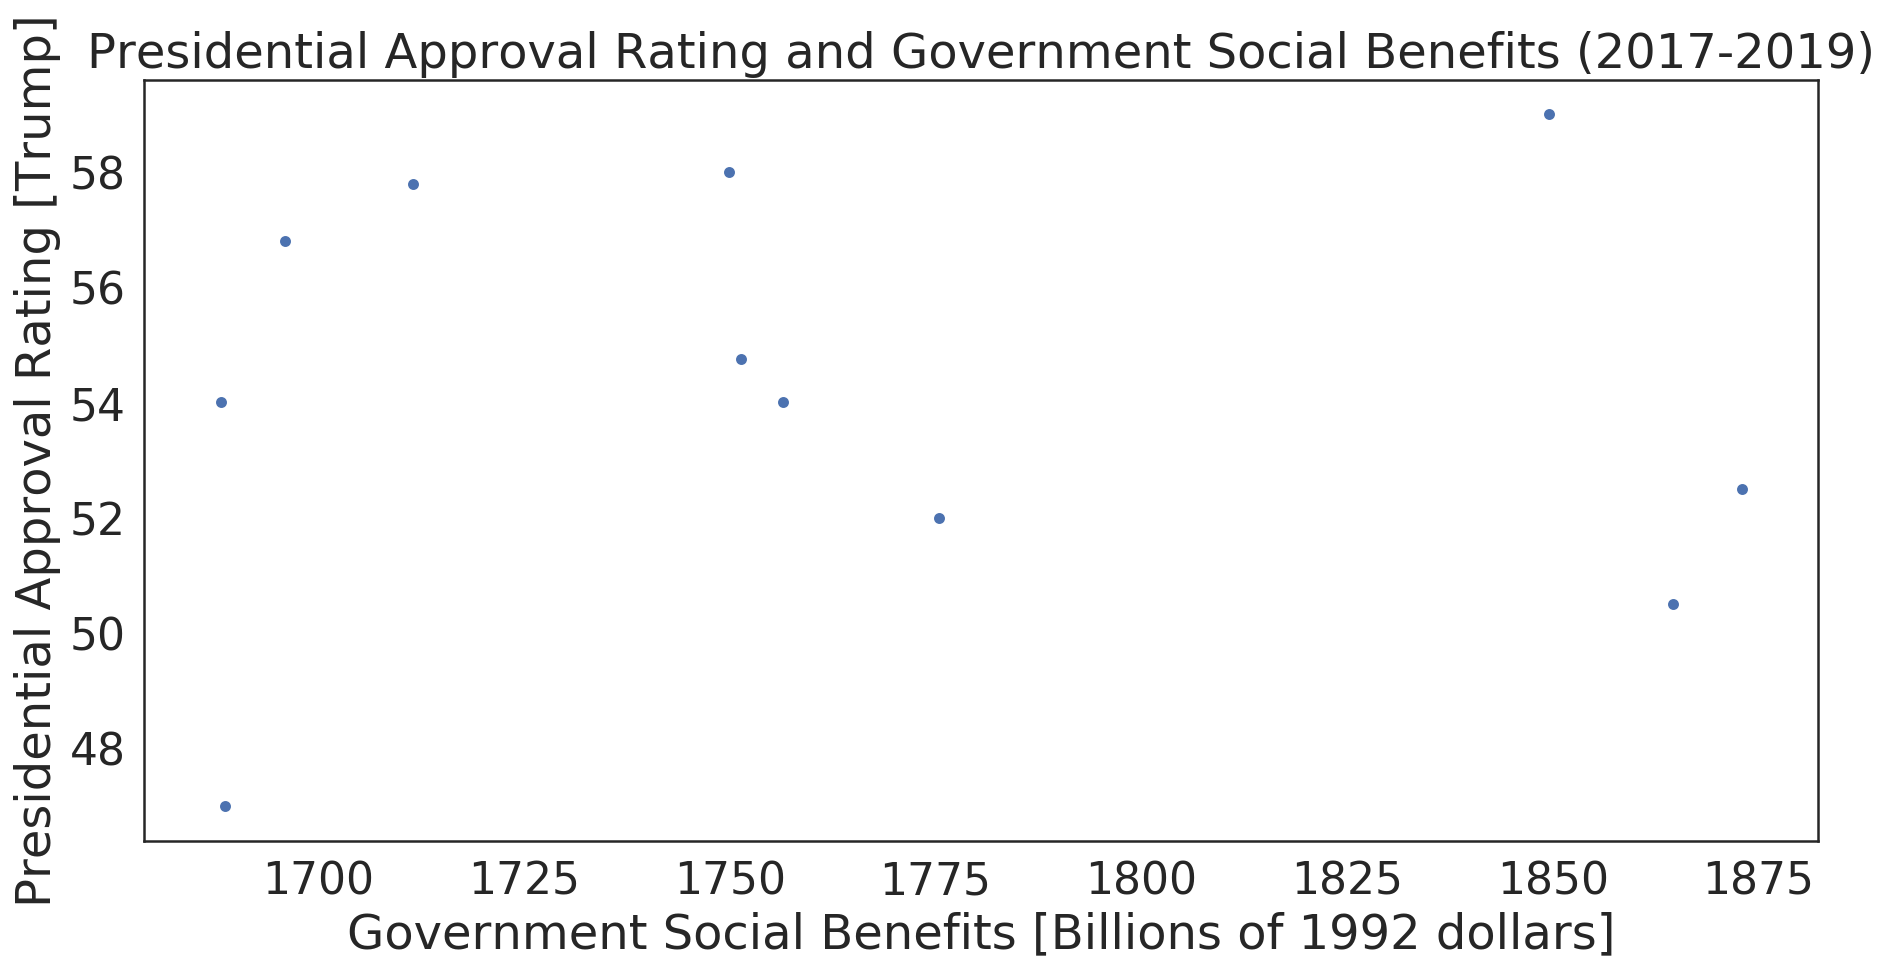

In [30]:
#Scatter Plot for Approval Ratings

fig = df_Trump.plot.scatter(x='Adjusted_Sales', y='Approving', figsize=(15,7))
fig.set_xlabel('Government Social Benefits [Billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Trump]')
fig.set_title('Presidential Approval Rating and Government Social Benefits (2017-2019)')

#Scatter Plot for Disapproval Ratings

fig = df_Trump.plot.scatter(x='Adjusted_Sales', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Government Social Benefits [Billions of 1992 dollars]')
fig.set_ylabel('Presidential Approval Rating [Trump]')
fig.set_title('Presidential Approval Rating and Government Social Benefits (2017-2019)')

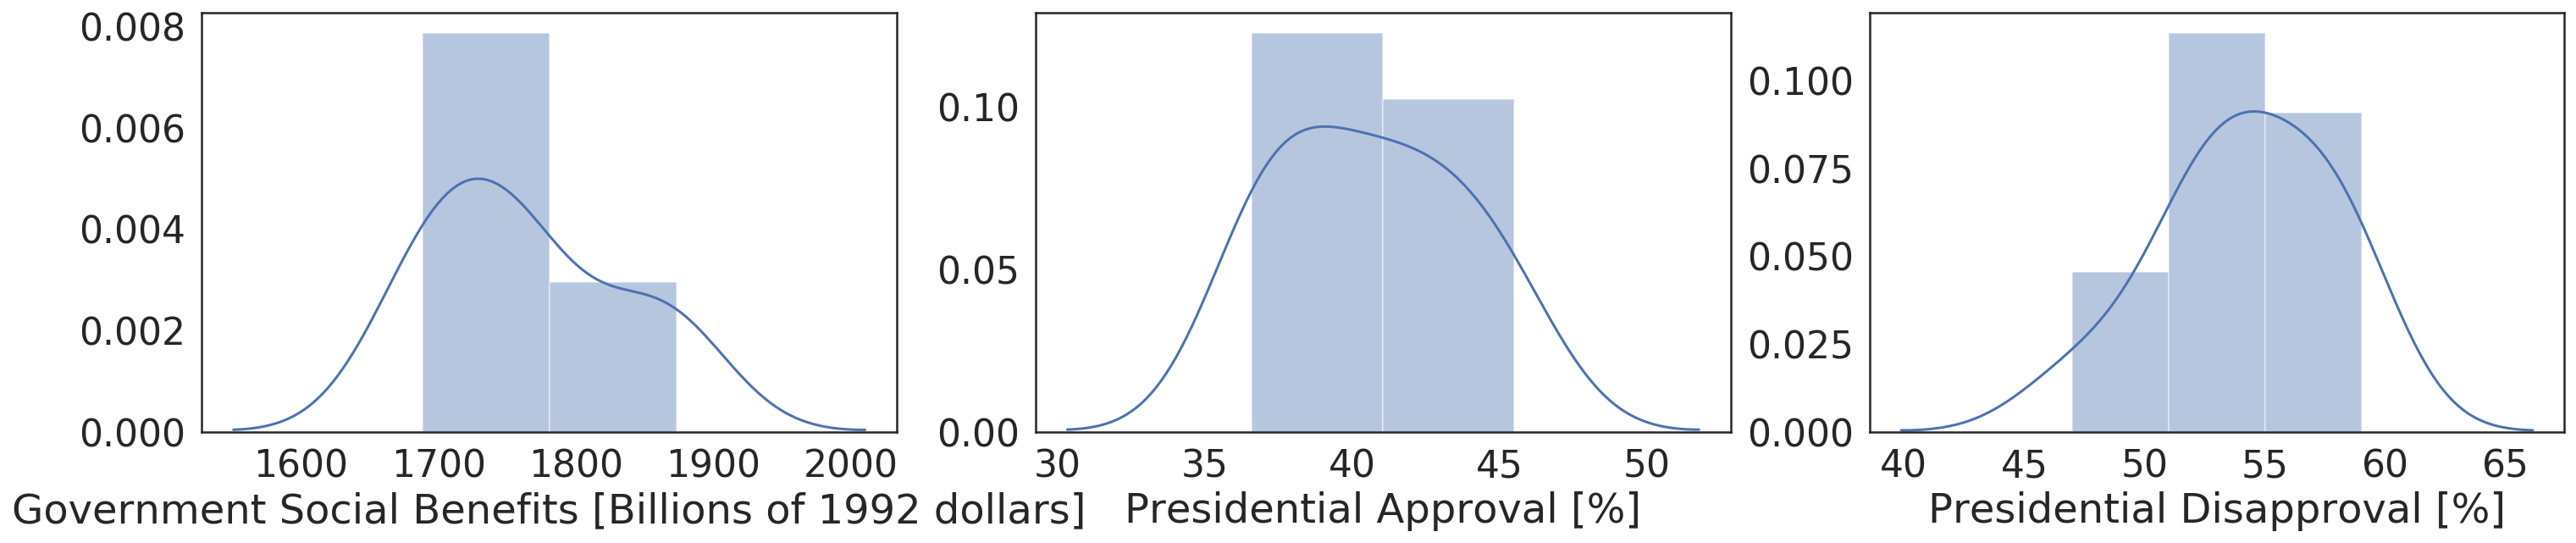

In [31]:
#Distplot for Adjusted Sales, Approval, Disapproval

plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df_Trump['Adjusted_Sales'])
plt.xlabel('Government Social Benefits [Billions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df_Trump['Approving'])
plt.xlabel('Presidential Approval [%]');

plt.subplot(233)
sns.distplot(df_Trump['Disapproving'])
plt.xlabel('Presidential Disapproval [%]');

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.7219
Date:                Sun, 07 Jun 2020   Prob (F-statistic):              0.418
Time:                        21:15:15   Log-Likelihood:                -27.401
No. Observations:                  11   AIC:                             58.80
Df Residuals:                       9   BIC:                             59.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.6917     25.836      0.

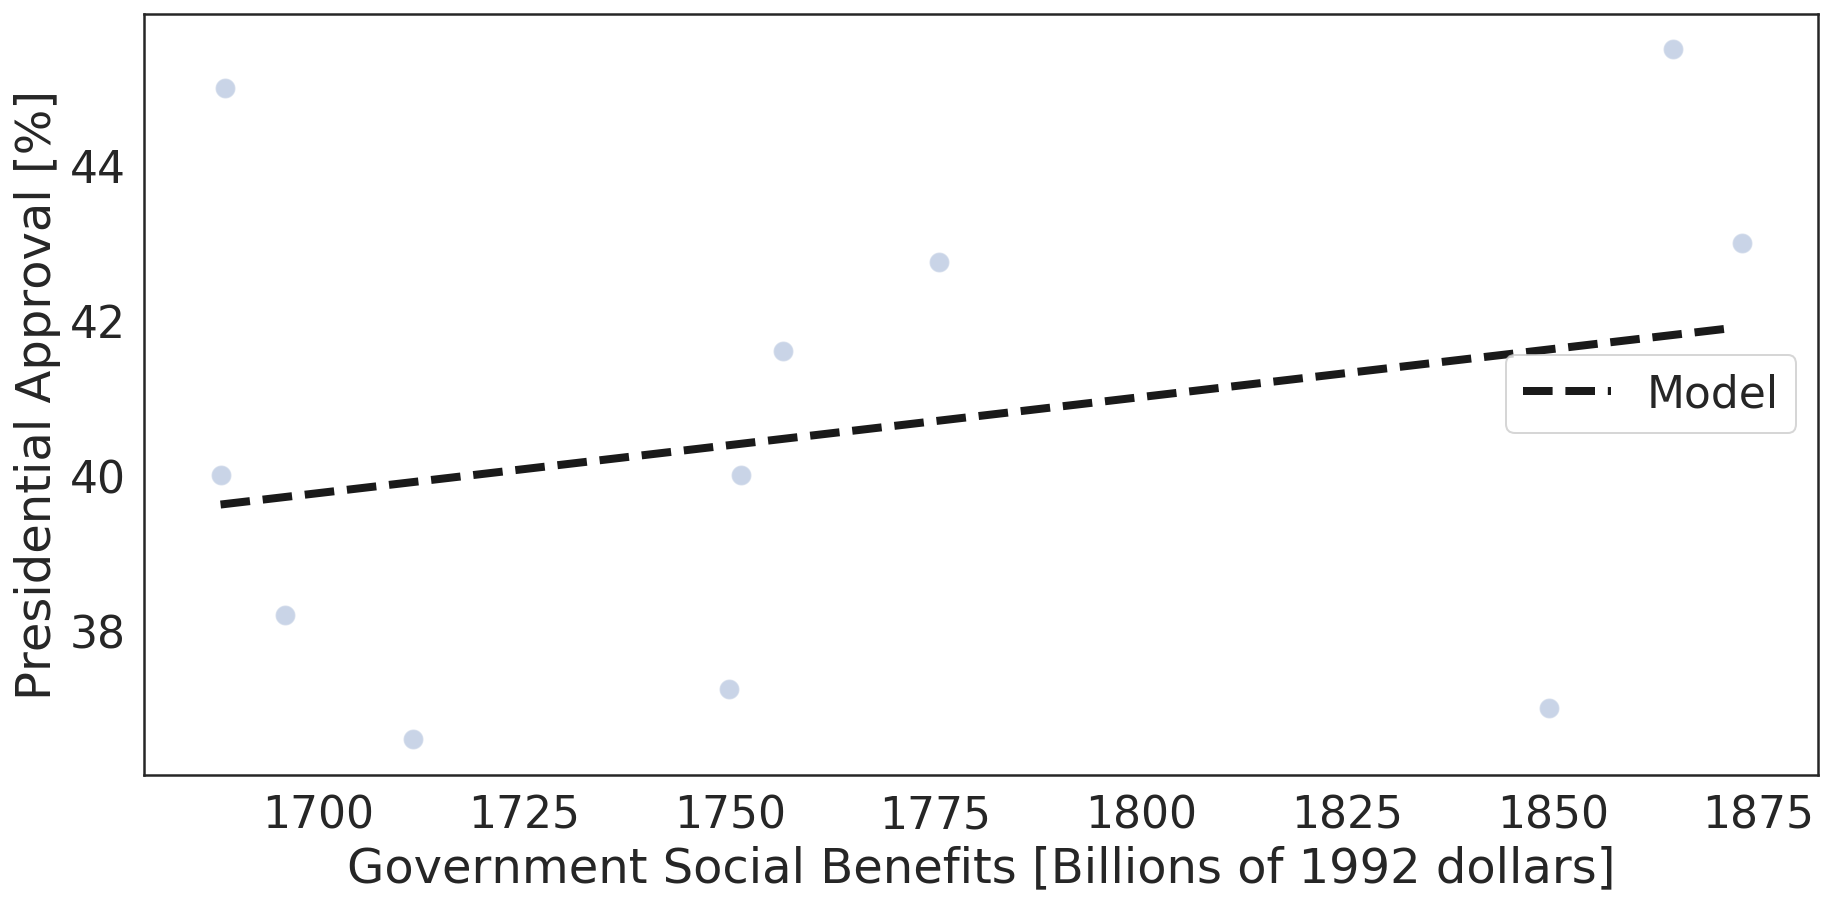

In [32]:
#OLS 

outcome, predictors = patsy.dmatrices('Approving ~ Adjusted_Sales', df_Trump)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

#Regression 

plt.figure(figsize=(15, 7))
sns.scatterplot(x='Adjusted_Sales', y='Approving', alpha=0.3, data=df_Trump, s=100)
xs = np.arange(df_Trump['Adjusted_Sales'].min(), df_Trump['Adjusted_Sales'].max())
ys = .0124  * xs + 18.6917
plt.plot(xs, ys, '--k', linewidth=4, label='Model')
plt.xlabel('Government Social Benefits [Billions of 1992 dollars]')
plt.ylabel('Presidential Approval [%]')
plt.legend();

#### Conclusion 
1) Clinton
    - R sqaured valued of .5
    - Positive Correlation (approval increased as public spending increased)
    - Overall highest modal approval rating and lowest modal disapproval
2) Bush
    - Highest R sqaured value at .69
    - Positive Correlation (approval increased as public spending decreased)
    - Overall lowest modal approval rating and highest modal disapproval
3) Obama
    - Very low R value at .1
    - Negative Correlation (approval increased as public spending decreased)
    - Least skewed approval and disapproval rating (almost unimodal)
4) Trump
    - Very little data comparatively 
    - Low R squared value
    - Positive Correlation (approval increased as public spending increased)

## Ethics & Privacy

In considering our question, we may not have ben able to draw a complete conclusion around the relationship between all consumer spending and presidential approval. We limited our scope to include the past 5 presidents as we lacked economic data that went back further. Our project runs the risk of exposing the extent of American capitalism as it could reveal that consumers care more about having/spending money and having consumer confidence than the true job performance of the president. Our data is from government and university sources, so we are confident that it is credible. In addition, our results may seem uneventful but we conclude that this is the result of a true measurement of the relationships analyzed rather than our group aiming for a target correlation to appear amidst our calculations. We believe our work is ethical data science rather than shock value or click bait.

None of our datasets included any information on the particpants in the surveys, so we did not have to worry about anonymizing it or removing such personally identifiable information such as names, phone numbers, or addresses. The privacy of the persons invlolved is therefore the responsibility of those who gathered the initial data that we used. 

## Conclusion & Discussion

In conclusion, the relationship between overall consumer spending and presidential approval likely boils down to a number of factors that were not analyzed by our team. Though we found some correlations, all were pretty weak when we digged deeper. 

#### Car Sales
In analyzing the retail automotive data, we found little to no correlations. When the data was split into two time sections, we found that up to 2008, there seemed to be a positive correlation, although weak. From 2008 to as present as our data went, we found a weak negative correlation. Perhaps the 2008 recession contributed to less consumer confidence but the handling of the situation by Obama was satisfactory to survey participants. This 2008-2020 result contradicts our hypothesis that more consumer confidence would co-occur with more perceived approval of the president's job performance. 

#### Clothing Sales

There seems to be a general negative correlation between clothing sales and presidential approval rating, where more sales are made, the lower the rating. This contradicts our original hypothesis in that consumer spending would be higher in times of presidential approval. With this said, there seems to be a greater positive correlation from 1992-2003, while negative correlation is strongest from 2003-2020. Additionally, r-squared value was highest during the positive correlation period from 1992-2003, while it was relatively low from 2003-2020 and overall. Since it is unknown why specifically these two periods vary so drastically in their regressions, this may suggest that other confounding factors are at play.

Throughout the period between 1992-2020, clothing sales seem to be pretty steadily increasing, while at a higher rate at some points than others. On the other hand, the approval data is more irregular, as it shifts between periods of growth and decline. It is possible that any of the correlations found are simply responsive to how the approval rating data is behaving. Especially since there is a positive correlation from 1992-2003 (when approval is also increasing), and a negative correlation from 2003-2020 (when approval is decreasing). 

It is also important to note, though, that during major peaks in approval rating, the clothing sales seem to inversely respond. For example, when approval peaks near 2001 and 2008, clothing sales also dip at the same time. It seems as though during major domestic crises (9/11 in 2001, 2008 economic crisis), clothing spending goes down while approval rating simultaneously goes up. It could be that presidential approval rating is generally higher during times of crisis, which also happens to be when clothing sales are falling. Furthermore, a possible confounding variable could be that sales are driven more by current events/crises of the time, rather than the presidential approval rating necessarily. Or, maybe, a combination of both.

#### Restaurant Sales

Similar to car sales, we found basically no relationship between restaurant sales and approval of the president. When we split the data again at 2008, we saw a weak negative reltionship prior to 2008 followed by no relationship from 2008 to the present. Perhaps spending at restaurants is not an accurate measure of non-essential spending as all families need to eat, and the United States has a booming fast food industry where they can spend little money for a lot of food. 

#### Government Social Benefits
Our government public spending data revealed interesting patterns that seemed to cycle as the presidents did. THerefore, we split and analyzed the data separately by administration. For our data from 1993-2000, roughly Clinton's terms in office, there was a strong positive correlation between public spending by the billions and the percent of approval. However, this inverted for Bush from 2001-2008. Bush's administration had a strong negative correlation suggesting that the more that was spent on the public, the less they approved of him. This definitely contradicted our hypothesis as we thought that people would approve more of presidents who spent more money on the public. (I guess you really can't buy love, Bush.) The analysis on Obama's 2009-2016 terms shows a weak negative correlation, and the little data that we had on Trump might hint at a wek positive relationship forming, but it is too early to tell. We do not have a complete picture of what public spending or approval look like for Trump as, unfortunately, he is still in office. 

#### Discussion
As mentioned previously, our three retail datsets may have not created an accurate portrayal of consumer non-essential spending. This may have limited our ability to analyze non-essential spending. In the future, we would use more datasets to depict non-essential spending in a more realistic way. Besides the Clinton's administration's public spending, our hypothesis was generally incorrect. This may have been because consumer confidence is only one of many factors that contribute to the president's job performance. The president's job involves more than just economic choices, but also foreign relations, public appearances, and now Twitter. With the timeline that we had, we are proud of our project. If we were to do it again knowing what we know now, the results could reveal interesting implications for presidential campaigns, marketing, and government policy. 

## Team Contributions

Martyna

Alyssa

Sachiko

Janhavi

Haley cleaned the presidential approval data, visualized the project with Miro (see setup), and contributed to written portions of final project.